#Install scikit learn extra

In [ ]:
%pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 


#Import libraries

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist, pdist
import plotly.express as px
import plotly.graph_objects as go
from itertools import product

ModuleNotFoundError: ignored

#exploratory data analysis

In [ ]:
# import the dataset
creditcard_df=pd.read_csv("/content/CC GENERAL.csv")
creditcard_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
# information about the data
creditcard_df.info()



NameError: ignored

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

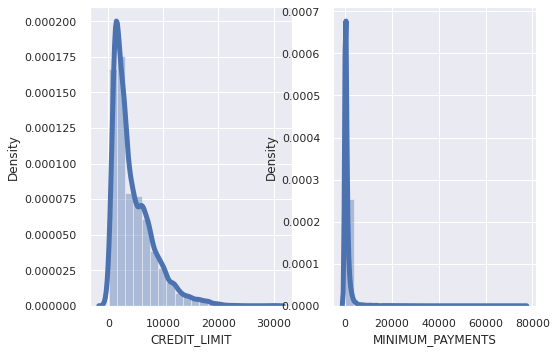

In [ ]:
missing_var = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
# see normal distribution of columns having null value
sns.set()
for i,var in enumerate(missing_var):
  plt.subplot(1,2,i+1)
  sns.distplot(creditcard_df[var],bins=20,kde_kws={'linewidth':5})

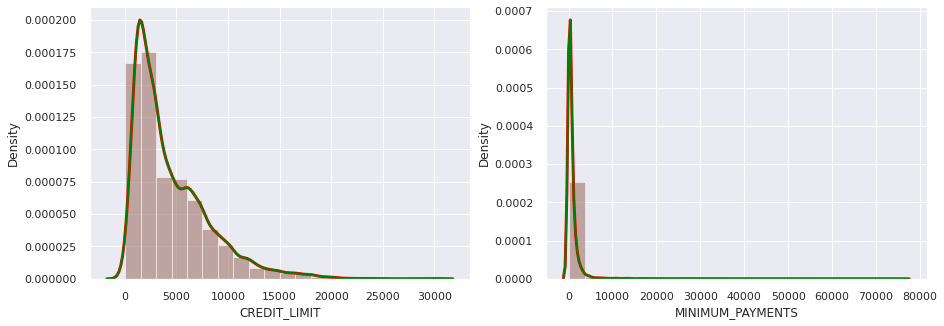

In [ ]:
# check the normal distribution of columns having null values by filling with the mean value
plt.figure(figsize=(15,5))
sns.set()
for i,var in enumerate(missing_var):
  plt.subplot(1,2,i+1)
  sns.distplot(creditcard_df[var],bins=20,kde_kws={'linewidth':3,'color':'red'},label="original")
  sns.distplot(creditcard_df[var],bins=20,kde_kws={'linewidth':2,'color':'green'},label="mean")

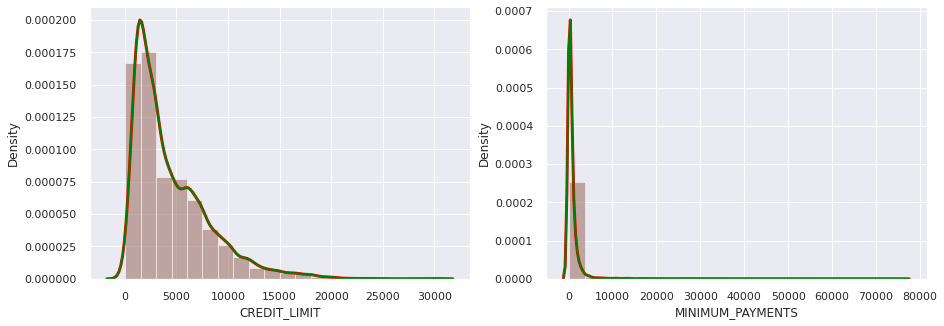

In [ ]:
# check the normal distribution of columns having null values by filling with the median value
plt.figure(figsize=(15,5))
sns.set()
for i,var in enumerate(missing_var):
  plt.subplot(1,2,i+1)
  sns.distplot(creditcard_df[var],bins=20,kde_kws={'linewidth':3,'color':'red'},label="original")
  sns.distplot(creditcard_df[var],bins=20,kde_kws={'linewidth':2,'color':'green'},label="median")

In [ ]:
# fill mean value in place of missing values
creditcard_df["MINIMUM_PAYMENTS"]=creditcard_df["MINIMUM_PAYMENTS"].fillna(creditcard_df["MINIMUM_PAYMENTS"].mean())
creditcard_df["CREDIT_LIMIT"]=creditcard_df["CREDIT_LIMIT"].fillna(creditcard_df["CREDIT_LIMIT"].mean())

In [ ]:
# check duplicate entries in the dataset
creditcard_df.duplicated().sum()

0

In [ ]:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
# drop unnecessary columns
creditcard_df.drop(columns=["CUST_ID"],axis=1,inplace=True)

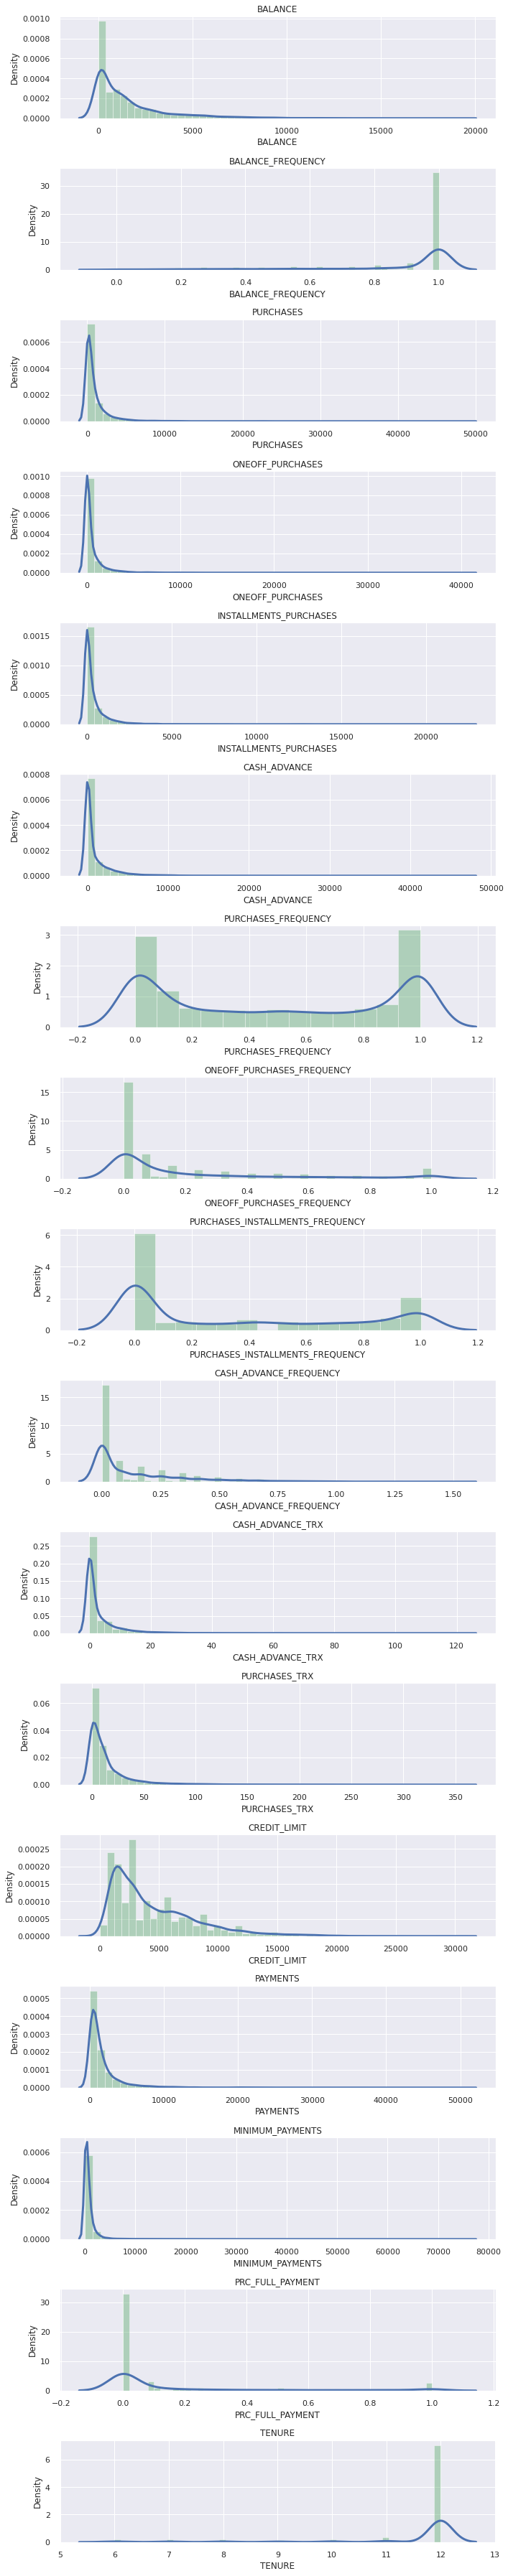

In [ ]:
# visualise probability density of all columns
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(creditcard_df.columns[i])
plt.tight_layout()
# This is to ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(creditcard_df.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(creditcard_df[creditcard_df.columns[i]])
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [ ]:
# find outlier in all columns
for i in creditcard_df.select_dtypes(include=['float64','int64']).columns:
  max_thresold=creditcard_df[i].quantile(0.95)
  min_thresold=creditcard_df[i].quantile(0.05)
  creditcard_df_no_outlier=creditcard_df[(creditcard_df[i] < max_thresold) & (creditcard_df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((creditcard_df.shape[0]-creditcard_df_no_outlier[0])/creditcard_df.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [ ]:
# remove outliers from columns having nearly 10% outlier
max_thresold_BALANCE=creditcard_df["BALANCE"].quantile(0.95)
min_thresold_BALANCE=creditcard_df["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT=creditcard_df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT=creditcard_df["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS=creditcard_df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS=creditcard_df["PAYMENTS"].quantile(0.05)
creditcard_df_no_outlier=creditcard_df[(creditcard_df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) & (creditcard_df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) & (creditcard_df["BALANCE"] < max_thresold_BALANCE) & (creditcard_df["BALANCE"] > min_thresold_BALANCE) &  (creditcard_df["PAYMENTS"] < max_thresold_PAYMENTS) & (creditcard_df["PAYMENTS"] > min_thresold_PAYMENTS)]

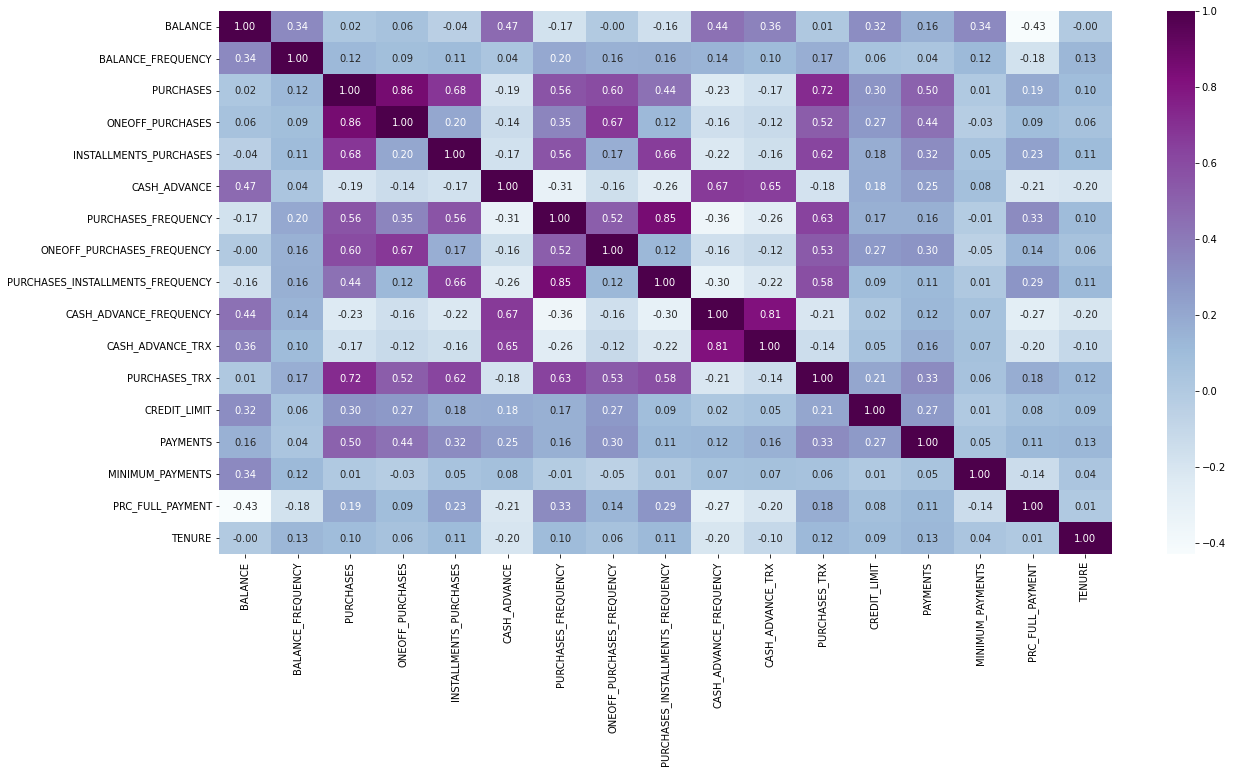

In [ ]:
# correlation matrix of DataFrame
plt.figure(figsize=(20,10))
corn=creditcard_df_no_outlier.corr()
sns.heatmap(corn,annot=True,cmap="BuPu",fmt='.2f')


#Preprocessing

In [ ]:
# scale the DataFrame
scalar=StandardScaler()
creditcard_scaled_df=scalar.fit_transform(creditcard_df_no_outlier)

In [ ]:
# Model Init
number_of_cluster = np.arange(2,11) # Number of Clusters

In [ ]:
#running PCA with full components
pca_all = PCA(n_components=len(creditcard_df_no_outlier.columns), random_state = 2022)
pca_all.fit(creditcard_df_no_outlier)
variance = pca_all.explained_variance_ratio_
var = np.cumsum(variance)*100

#plot for information extracted
fig = px.line(x=np.arange(len(creditcard_df_no_outlier.columns))+1, y=var, markers=True)
fig.update_xaxes(title_text='# of Features')
fig.update_yaxes(title_text='% Variance Explained')
fig.update_layout(width=900)

In [ ]:
#total information extracted after pca with 2 components
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted 62.87048782311891 %


In [ ]:
#total information extracted after pca with 3 components
print('information extracted {} %'.format(np.sum(variance[:3])*100/np.sum(variance)))

information extracted 77.597905046425 %


In [ ]:
# Reducing the dimensions of the data for 2 comp
pca_n = PCA(n_components = 2)
X_principal_2 = pca_n.fit_transform(creditcard_scaled_df)
X_principal_2 = pd.DataFrame(X_principal_2)
X_principal_2.columns = ['P1', 'P2']
X_principal_2.head()


P1        P2
0 -2.286536  3.004158
1  1.134737  0.432069
2 -1.458104 -1.493240
3  0.740705 -0.539481
4  0.648385 -1.076904

In [ ]:
# Reducing the dimensions of the data for 3 comp
pca_n = PCA(n_components = 3)
X_principal_3 = pca_n.fit_transform(creditcard_scaled_df)
X_principal_3 = pd.DataFrame(X_principal_3)
X_principal_3.columns = ['P1', 'P2','P3']
X_principal_3.head()

P1        P2        P3
0 -2.286550  3.003810 -0.607013
1  1.134728  0.431935 -1.014975
2 -1.458101 -1.493215 -0.087624
3  0.740697 -0.539433  1.840081
4  0.648372 -1.077119  2.001129

In [ ]:
#plot for dimensions after pca
fig = go.Figure(go.Scatter(
    x=X_principal_2['P1'], y=X_principal_2['P2'], mode='markers'))
fig.update_xaxes(title_text='P2')
fig.update_yaxes(title_text='P1')
fig.update_layout(height=700, width=700,
                  title_text='Principal Component Analysis')



NameError: ignored

#Clustering

##agglomerative

###With 2 pca components

In [ ]:
# Create Accumulator for matric
ward_s_scores_2 = []
ward_db_scores_2 = []
ward_calinski_scores_2 = []
average_s_scores_2 = []
average_db_scores_2 = []
average_calinski_scores_2 = []
complete_s_scores_2 = []
complete_db_scores_2 = []
complete_calinski_scores_2 = []

agglo_metrics_2 = {'ward': [ward_s_scores_2, ward_db_scores_2, ward_calinski_scores_2, 'rgb(128,177,211)'],
                 'average': [average_s_scores_2, average_db_scores_2, average_calinski_scores_2, 'rgb(141,211,199)'],
                 'complete': [complete_s_scores_2, complete_db_scores_2, complete_calinski_scores_2, 'rgb(251,128,114)']}

for i, j in product(agglo_metrics_2, number_of_cluster):
    agglo = AgglomerativeClustering(linkage=i, n_clusters=j)
    agglo.fit(X_principal_2)
    agglo_metrics_2[i][0].append(silhouette_score(
        X_principal_2, agglo.labels_))
    agglo_metrics_2[i][1].append(davies_bouldin_score(
        X_principal_2, agglo.labels_))
    agglo_metrics_2[i][2].append(calinski_harabasz_score(
        X_principal_2, agglo.labels_))

In [ ]:
#silhouette score between each method
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in agglo_metrics_2:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=agglo_metrics_2[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=agglo_metrics_2[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Metrics',
                  title_text='Agglomerative Clustering Metric Scores')

In [ ]:
#creating new dataframe for agglomerative clustering
df_dend_2 = X_principal_2.copy()



In [ ]:
#adding new columns for ward based on sihouette
agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
df_dend_2['ward_Sihouette'] = agg_ward.fit_predict(X_principal_2)
#adding new columns for ward based on Davies Bouldin
agg_ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
df_dend_2['ward_Davies-Bouldin'] = agg_ward.fit_predict(X_principal_2)
#adding new columns for ward based on Calinski-Harabasz
agg_ward = AgglomerativeClustering(n_clusters=7, linkage='ward')
df_dend_2['ward_Calinski-Harabasz'] = agg_ward.fit_predict(X_principal_2)


#adding new columns for average based on Sihoutte
agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
df_dend_2['average_Sihouette'] = agg_average.fit_predict(X_principal_2)
#adding new columns for average based on Davies Bouldin
agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
df_dend_2['average_Davies-Bouldin'] = agg_average.fit_predict(X_principal_2)
#adding new columns for average based on Calinksi-Harabasz
agg_average = AgglomerativeClustering(n_clusters=6, linkage='average')
df_dend_2['average_Calinski-Harabasz'] = agg_average.fit_predict(X_principal_2)


#adding new columns for complete based on Sihoutte
agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
df_dend_2['complete_Sihouette'] = agg_complete.fit_predict(X_principal_2)
#adding new columns for complete based on Davies Bouldin
agg_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
df_dend_2['complete_Davies-Bouldin'] = agg_complete.fit_predict(X_principal_2)
#adding new columns for complete based on Calinksi-Harabasz
agg_complete = AgglomerativeClustering(n_clusters=7, linkage='complete')
df_dend_2['complete_Calinski-Harabasz'] = agg_complete.fit_predict(X_principal_2)

#showing dataframe
df_dend_2

P1        P2  ward_Sihouette  ward_Davies-Bouldin  \
0    -2.286540  3.004139               0                    2   
1     1.134736  0.432190               1                    0   
2    -1.458101 -1.493150               0                    5   
3     0.740709 -0.539077               0                    1   
4     0.648372 -1.077172               0                    1   
...        ...       ...             ...                  ...   
6461  1.941408 -1.029755               0                    1   
6462  0.489226 -2.199355               0                    1   
6463 -0.146912 -2.372580               0                    1   
6464 -0.677278 -2.305963               0                    5   
6465 -2.501136 -1.147838               0                    3   

      ward_Calinski-Harabasz  average_Sihouette  average_Davies-Bouldin  \
0                          2                  0                       0   
1                          3                  0                       0   
2                          5                  0                       0   
3                          0                  0                       0   
4                          0                  0                       0   
...                      ...                ...                     ...   
6461                       0                  0                       0   
6462                       0                  0                       0   
6463                       0                  0                       0   
6464                       5                  0                       0   
6465                       1                  0                       0   

      average_Calinski-Harabasz  complete_Sihouette  complete_Davies-Bouldin  \
0                             1                   0                        2   
1                             1                   0                        2   
2                             1                   0                        2   
3                             1                   0                        2   
4                             1                   0                        2   
...                         ...                 ...                      ...   
6461                          1                   0                        2   
6462                          1                   0                        2   
6463                          1                   0                        2   
6464                          1                   0                        2   
6465                          1                   0                        2   

      complete_Calinski-Harabasz  
0                              6  
1                              4  
2                              4  
3                              4  
4                              4  
...                          ...  
6461                           4  
6462                           4  
6463                           4  
6464                           4  
6465                           4  

[6466 rows x 11 columns]

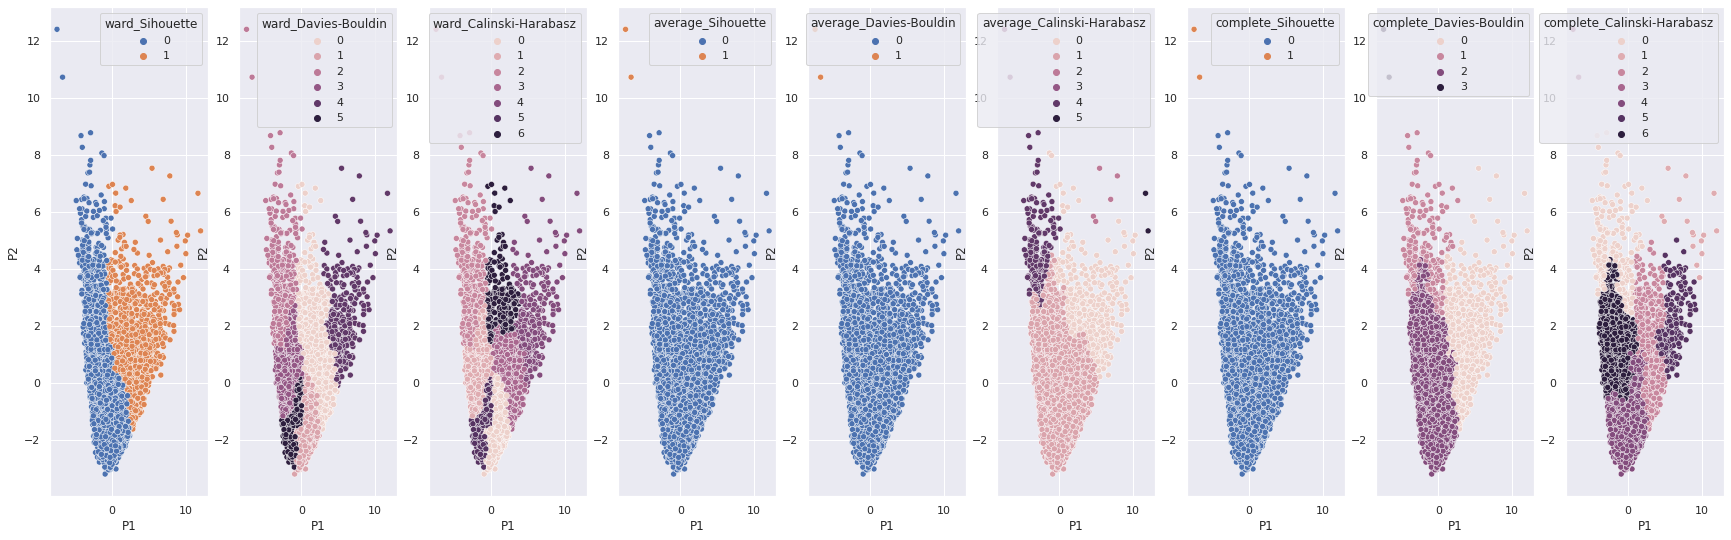

In [ ]:
#creating visualization to compare the result from the best score for each agglomerative clustering method
num, hue = 0, ['ward_Sihouette','ward_Davies-Bouldin','ward_Calinski-Harabasz',
               'average_Sihouette','average_Davies-Bouldin','average_Calinski-Harabasz',
              'complete_Sihouette','complete_Davies-Bouldin','complete_Calinski-Harabasz']
plt.figure(figsize=(30, 9))
for i in hue:
    num += 1
    plt.subplot(1, 9, num)
    sns.scatterplot(x='P1', y='P2', hue=i, data=df_dend_2)


###With 3 pca components

In [ ]:
# Create Accumulator for matric
ward_s_scores_3 = []
ward_db_scores_3 = []
ward_calinski_scores_3 = []
average_s_scores_3 = []
average_db_scores_3 = []
average_calinski_scores_3 = []
complete_s_scores_3 = []
complete_db_scores_3 = []
complete_calinski_scores_3 = []

agglo_metrics_3 = {'ward': [ward_s_scores_3, ward_db_scores_3, ward_calinski_scores_3, 'rgb(128,177,211)'],
                 'average': [average_s_scores_3, average_db_scores_3, average_calinski_scores_3, 'rgb(141,211,199)'],
                 'complete': [complete_s_scores_3, complete_db_scores_3, complete_calinski_scores_3, 'rgb(251,128,114)']}

for i, j in product(agglo_metrics_3, number_of_cluster):
    agglo = AgglomerativeClustering(linkage=i, n_clusters=j)
    agglo.fit(X_principal_3)
    agglo_metrics_3[i][0].append(silhouette_score(
        X_principal_3, agglo.labels_))
    agglo_metrics_3[i][1].append(davies_bouldin_score(
        X_principal_3, agglo.labels_))
    agglo_metrics_3[i][2].append(calinski_harabasz_score(
        X_principal_3, agglo.labels_))

In [ ]:
#score between each method
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in agglo_metrics_3:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=agglo_metrics_3[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=agglo_metrics_3[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Metrics',
                  title_text='Agglomerative Clustering Metric Scores')

In [ ]:
#creating new dataframe for agglomerative clustering
df_dend_3 = X_principal_3.copy()

In [ ]:
#adding new columns for ward based on sihouette
agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
df_dend_3['ward_Sihouette'] = agg_ward.fit_predict(X_principal_2)
#adding new columns for ward based on Davies Bouldin
agg_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_dend_3['ward_Davies-Bouldin'] = agg_ward.fit_predict(X_principal_2)
#adding new columns for ward based on Calinski-Harabasz
agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
df_dend_3['ward_Calinski-Harabasz'] = agg_ward.fit_predict(X_principal_2)


#adding new columns for average based on Sihoutte
agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
df_dend_3['average_Sihouette'] = agg_average.fit_predict(X_principal_2)
#adding new columns for average based on Davies Bouldin
agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
df_dend_3['average_Davies-Bouldin'] = agg_average.fit_predict(X_principal_2)
#adding new columns for average based on Calinksi-Harabasz
agg_average = AgglomerativeClustering(n_clusters=9, linkage='average')
df_dend_3['average_Calinski-Harabasz'] = agg_average.fit_predict(X_principal_2)


#adding new columns for complete based on Sihoutte
agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
df_dend_3['complete_Sihouette'] = agg_complete.fit_predict(X_principal_2)
#adding new columns for complete based on Davies Bouldin
agg_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
df_dend_3['complete_Davies-Bouldin'] = agg_complete.fit_predict(X_principal_2)
#adding new columns for complete based on Calinksi-Harabasz
agg_complete = AgglomerativeClustering(n_clusters=7, linkage='complete')
df_dend_3['complete_Calinski-Harabasz'] = agg_complete.fit_predict(X_principal_2)

#showing dataframe
df_dend_3

P1        P2        P3  ward_Sihouette  ward_Davies-Bouldin  \
0    -2.286558  3.003845 -0.608290               0                    2   
1     1.134719  0.431935 -1.014151               1                    0   
2    -1.458103 -1.493207 -0.087834               0                    1   
3     0.740689 -0.539432  1.840901               0                    3   
4     0.648377 -1.077146  2.002302               0                    3   
...        ...       ...       ...             ...                  ...   
6461  1.941398 -1.030015 -0.811187               0                    3   
6462  0.489233 -2.199331  0.400986               0                    3   
6463 -0.146900 -2.372479  0.075893               0                    3   
6464 -0.677266 -2.305822 -0.199558               0                    1   
6465 -2.501120 -1.147628 -1.876880               0                    1   

      ward_Calinski-Harabasz  average_Sihouette  average_Davies-Bouldin  \
0                          0                  0                       0   
1                          1                  0                       0   
2                          0                  0                       0   
3                          0                  0                       0   
4                          0                  0                       0   
...                      ...                ...                     ...   
6461                       0                  0                       0   
6462                       0                  0                       0   
6463                       0                  0                       0   
6464                       0                  0                       0   
6465                       0                  0                       0   

      average_Calinski-Harabasz  complete_Sihouette  complete_Davies-Bouldin  \
0                             0                   0                        2   
1                             0                   0                        2   
2                             0                   0                        2   
3                             0                   0                        2   
4                             0                   0                        2   
...                         ...                 ...                      ...   
6461                          0                   0                        2   
6462                          0                   0                        2   
6463                          0                   0                        2   
6464                          0                   0                        2   
6465                          0                   0                        2   

      complete_Calinski-Harabasz  
0                              6  
1                              4  
2                              4  
3                              4  
4                              4  
...                          ...  
6461                           4  
6462                           4  
6463                           4  
6464                           4  
6465                           4  

[6466 rows x 12 columns]

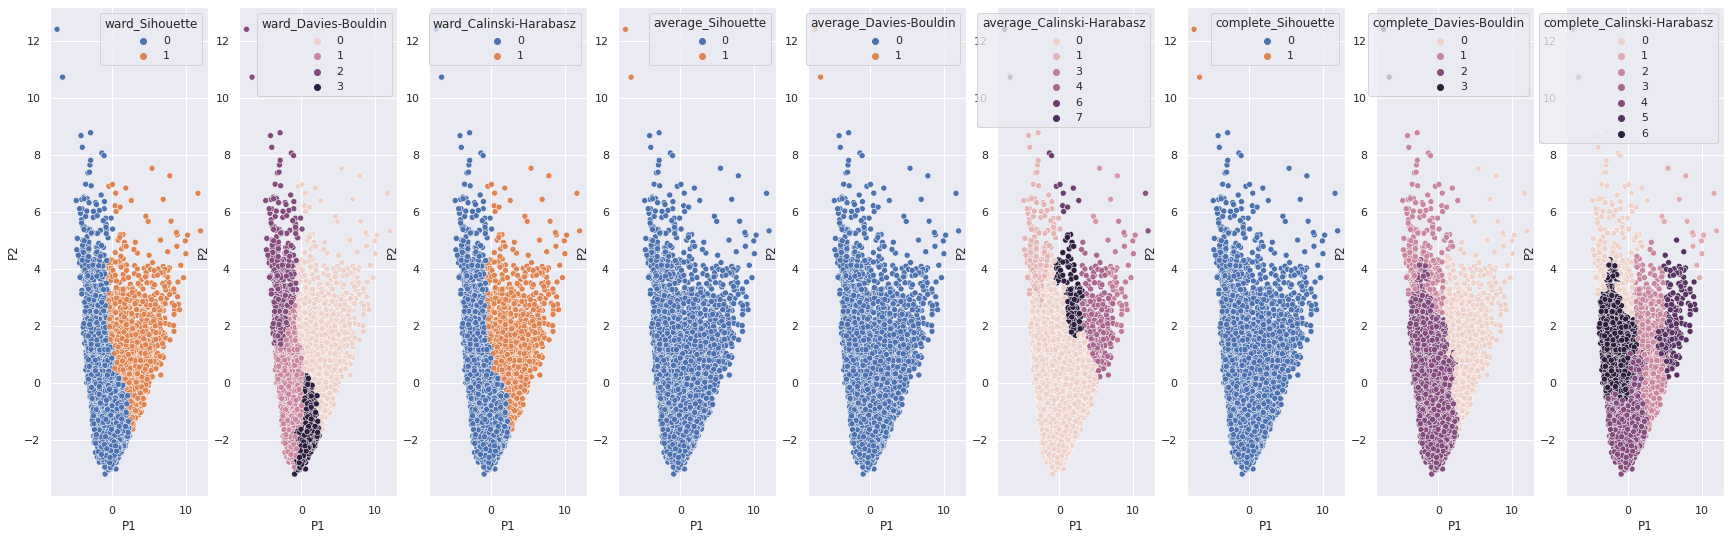

In [ ]:
#creating visualization to compare the result from the best score for each agglomerative clustering method
num, hue = 0, ['ward_Sihouette','ward_Davies-Bouldin','ward_Calinski-Harabasz',
               'average_Sihouette','average_Davies-Bouldin','average_Calinski-Harabasz',
              'complete_Sihouette','complete_Davies-Bouldin','complete_Calinski-Harabasz']
plt.figure(figsize=(30, 9))
for i in hue:
    num += 1
    plt.subplot(1, 9, num)
    sns.scatterplot(x='P1', y='P2', hue=i, data=df_dend_3)

In [ ]:
#creating new dataframe for agglomerative clustering
df_ward = X_principal_2.copy()

In [ ]:
agg_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_ward['ward_2comp'] = agg_ward.fit_predict(X_principal_2)
agg_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_ward['ward_3comp'] = agg_ward.fit_predict(X_principal_3)


###Compare best results of 2 and 3 components

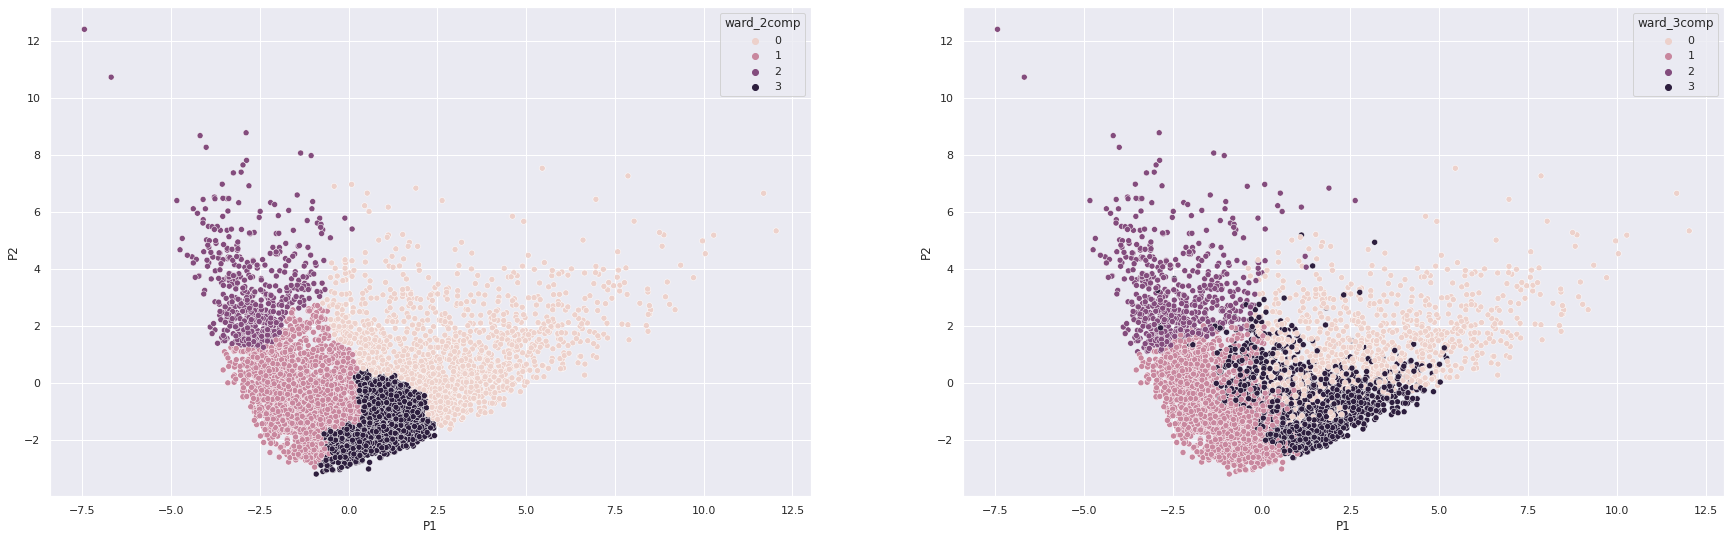

In [ ]:
#creating visualization to compare the result from the best score for each agglomerative clustering method
num, hue = 0, ['ward_2comp','ward_3comp']
plt.figure(figsize=(30, 9))
for i in hue:
    num += 1
    plt.subplot(1, 2, num)
    sns.scatterplot(x='P1', y='P2', hue=i, data=df_ward)

##Kmeans

###Elbow

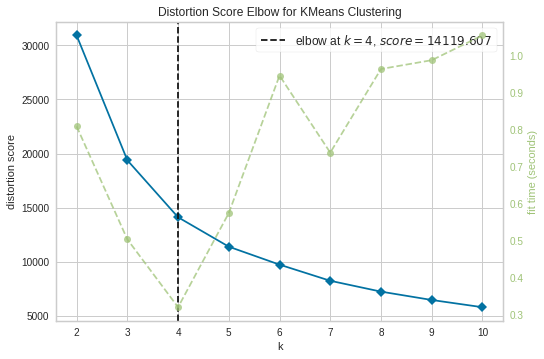

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make with 2 component
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(X_principal_2)
Elb.show()



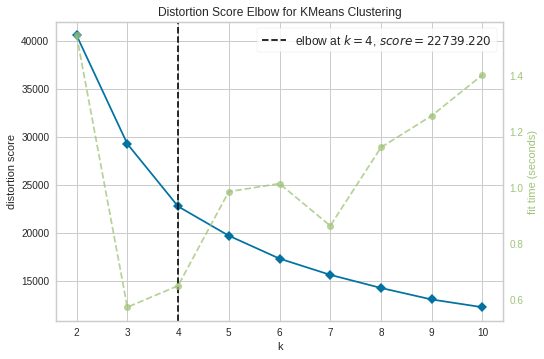

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make with 3 component
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(X_principal_3)
Elb.show()

###With 2 pca components

In [ ]:
# Create Accumulator for matric
kmeans_s_scores_2 = []
kmeans_db_scores_2 = []
kmeans_calinski_scores_2 = []

#looping for modeling
for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state = 2022)
    kmeans.fit(X_principal_2)
    kmeans_labels_2 = kmeans.predict(X_principal_2)
    kmeans_s_scores_2.append(silhouette_score(
        X_principal_2, kmeans_labels_2, metric='euclidean'))
    kmeans_db_scores_2.append(davies_bouldin_score(X_principal_2, kmeans_labels_2))
    kmeans_calinski_scores_2.append(
        calinski_harabasz_score(X_principal_2, kmeans_labels_2))

In [ ]:
#creating plot for scoring visualization
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)
kmeans_score_2 = {'Silhouette': kmeans_s_scores_2,
                'Davies Bouldin': kmeans_db_scores_2,
                'Calinski-Harabasz': kmeans_calinski_scores_2}

for i, score in zip(np.arange(1, 4), kmeans_score_2):
    fig.append_trace(go.Scatter(
        x=list(number_of_cluster), y=kmeans_score_2[score], name=score), row=i, col=1)
    fig.update_yaxes(title_text=score, row=i, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  showlegend=False,
                  title_text='Metric Scores')

### with 3 pca Components

In [ ]:
# Create Accumulator for matric
kmeans_s_scores_3 = []
kmeans_db_scores_3 = []
kmeans_calinski_scores_3 = []

#looping for modeling
for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state = 2022)
    kmeans.fit(X_principal_3)
    kmeans_labels_3 = kmeans.predict(X_principal_3)
    kmeans_s_scores_3.append(silhouette_score(
        X_principal_3, kmeans_labels_3, metric='euclidean'))
    kmeans_db_scores_3.append(davies_bouldin_score(X_principal_3, kmeans_labels_3))
    kmeans_calinski_scores_3.append(
        calinski_harabasz_score(X_principal_3, kmeans_labels_3))

In [ ]:
#creating plot for scoring visualization
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)
kmeans_scores_3 = {'Silhouette': kmeans_s_scores_3,
                'Davies Bouldin': kmeans_db_scores_3,
                'Calinski-Harabasz': kmeans_calinski_scores_3}

for i, score in zip(np.arange(1, 4), kmeans_scores_3):
    fig.append_trace(go.Scatter(
        x=list(number_of_cluster), y=kmeans_scores_3[score], name=score), row=i, col=1)
    fig.update_yaxes(title_text=score, row=i, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  showlegend=False,
                  title_text='Metric Scores')

In [ ]:
#creating new dataframe for k-means clustering
df_kmeans = X_principal_2.copy()

In [ ]:
kmeans_2comp = KMeans(4)
df_kmeans['2_component'] = kmeans_2comp.fit_predict(X_principal_2)
kmeans_3comp = KMeans(4)
df_kmeans['3_component'] = kmeans_2comp.fit_predict(X_principal_3)

###Copmare 2 and 3 components

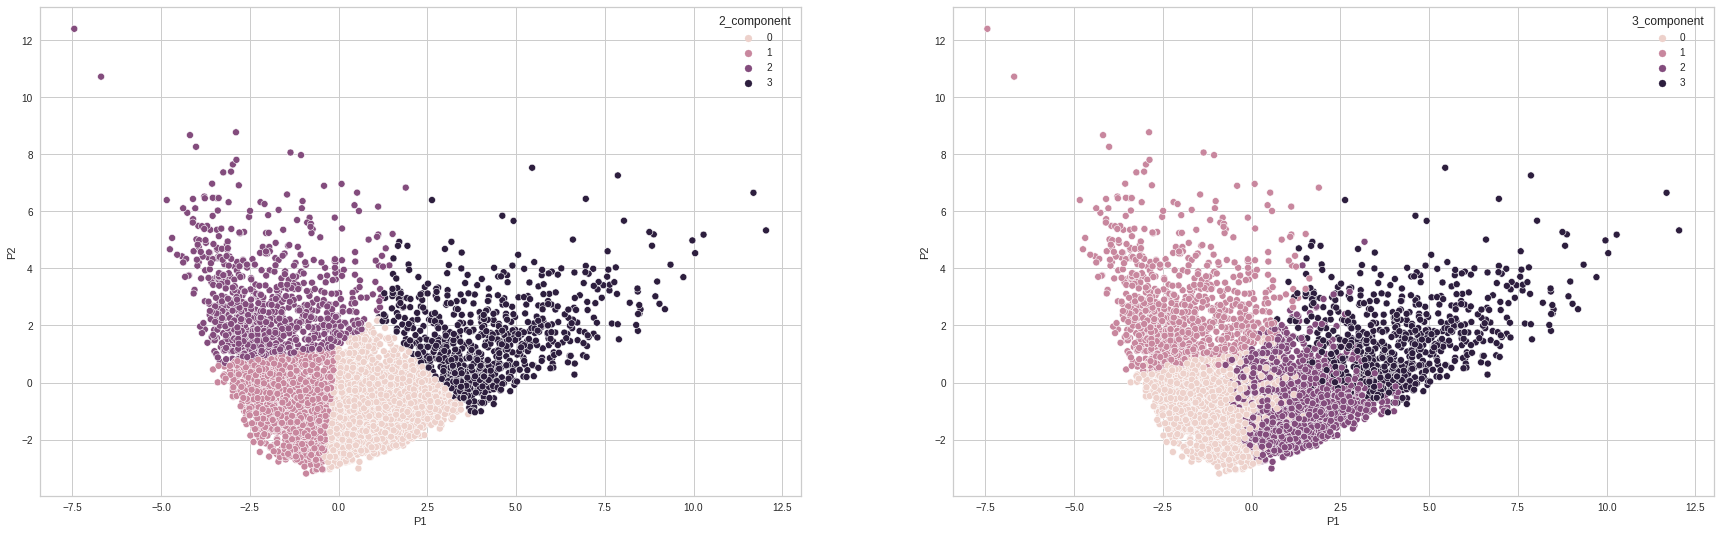

In [ ]:
#creating visualization to compare the result from the best score for each Kmeans clustering method
num, hue = 0, ['2_component','3_component']
plt.figure(figsize=(30, 9))
for i in hue:
    num += 1
    plt.subplot(1, 2, num)
    sns.scatterplot(x='P1', y='P2', hue=i, data=df_kmeans)

##Kmedoids

###With 2 pca components

In [ ]:
#creating list for metrics
manhattan_avg_withinSS_2 = []
euclidean_avg_withinSS_2 = []
cosine_avg_withinSS_2 = []

#creating list for metrics
kmedoids_avg_withinSS = {'cityblock': manhattan_avg_withinSS_2,
                         'euclidean': euclidean_avg_withinSS_2,
                         'cosine': cosine_avg_withinSS_2}

#looping for running k-medoids
for i, j in product(kmedoids_avg_withinSS, number_of_cluster):
    kmedoids = KMedoids(metric=i, n_clusters=j, random_state = 2022)
    kmedoids.fit(X_principal_2)

    D_k = cdist(X_principal_2, kmedoids.cluster_centers_, i)
    cIdx = np.argmin(D_k, axis=1)
    dist = np.min(D_k, axis=1)
    kmedoids_avg_withinSS[i].append(sum(dist)/X_principal_2.shape[0])

#creating plot to visualize elbow method scoring
fig = go.Figure()
for i in kmedoids_avg_withinSS:
    fig.add_trace(go.Scatter(x=list(number_of_cluster),
                  y=kmedoids_avg_withinSS[i],
                  name=i if i != 'cityblock' else 'manhattan'))

fig.update_xaxes(title_text='Number of Clusters')
fig.update_yaxes(title_text='Average Within Sum of Square')
fig.update_layout(width=900, legend_title_text='Metrics')

In [ ]:
# Create Accumulator for matric
manhattan_s_scores_2 = []
manhattan_db_scores_2 = []
manhattan_calinski_scores_2 = []
euclidean_s_scores_2 = []
euclidean_db_scores_2 = []
euclidean_calinski_scores_2 = []
cosine_s_scores_2 = []
cosine_db_scores_2 = []
cosine_calinski_scores_2 = []

kmedoids_metrics_2 = {'manhattan': [manhattan_s_scores_2, manhattan_db_scores_2, manhattan_calinski_scores_2, 'rgb(128,177,211)'],
                    'euclidean': [euclidean_s_scores_2, euclidean_db_scores_2, euclidean_calinski_scores_2, 'rgb(141,211,199)'],
                    'cosine': [cosine_s_scores_2, cosine_db_scores_2, cosine_calinski_scores_2, 'rgb(251,128,114)']}

#looping to run k-medoids by each distance metrics
for i, j in product(kmedoids_metrics_2, number_of_cluster):
    kmedoids = KMedoids(metric=i, n_clusters=j, random_state = 2022)
    kmedoids.fit(X_principal_2)
    kmedoids_metrics_2[i][0].append(silhouette_score(
        X_principal_2, kmedoids.labels_, metric=i))
    kmedoids_metrics_2[i][1].append(davies_bouldin_score(
        X_principal_2, kmedoids.labels_))
    kmedoids_metrics_2[i][2].append(calinski_harabasz_score(
        X_principal_2, kmedoids.labels_))

In [ ]:
#creating plot to compare the result
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in kmedoids_metrics_2:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=kmedoids_metrics_2[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=kmedoids_metrics_2[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Metrics',
                  title_text='Metric Scores',
                  legend_traceorder='reversed')

In [ ]:
#using 4 as number of clusters
kmedoids_manhattan = KMedoids(metric="manhattan", n_clusters=4)
kmedoids_euclidean = KMedoids(metric="euclidean", n_clusters=4)
kmedoids_cosine = KMedoids(metric="cosine", n_clusters=4)

#running the algorithm
kmedoids_manhattan.fit(X_principal_2)
kmedoids_euclidean.fit(X_principal_2)
kmedoids_cosine.fit(X_principal_2)

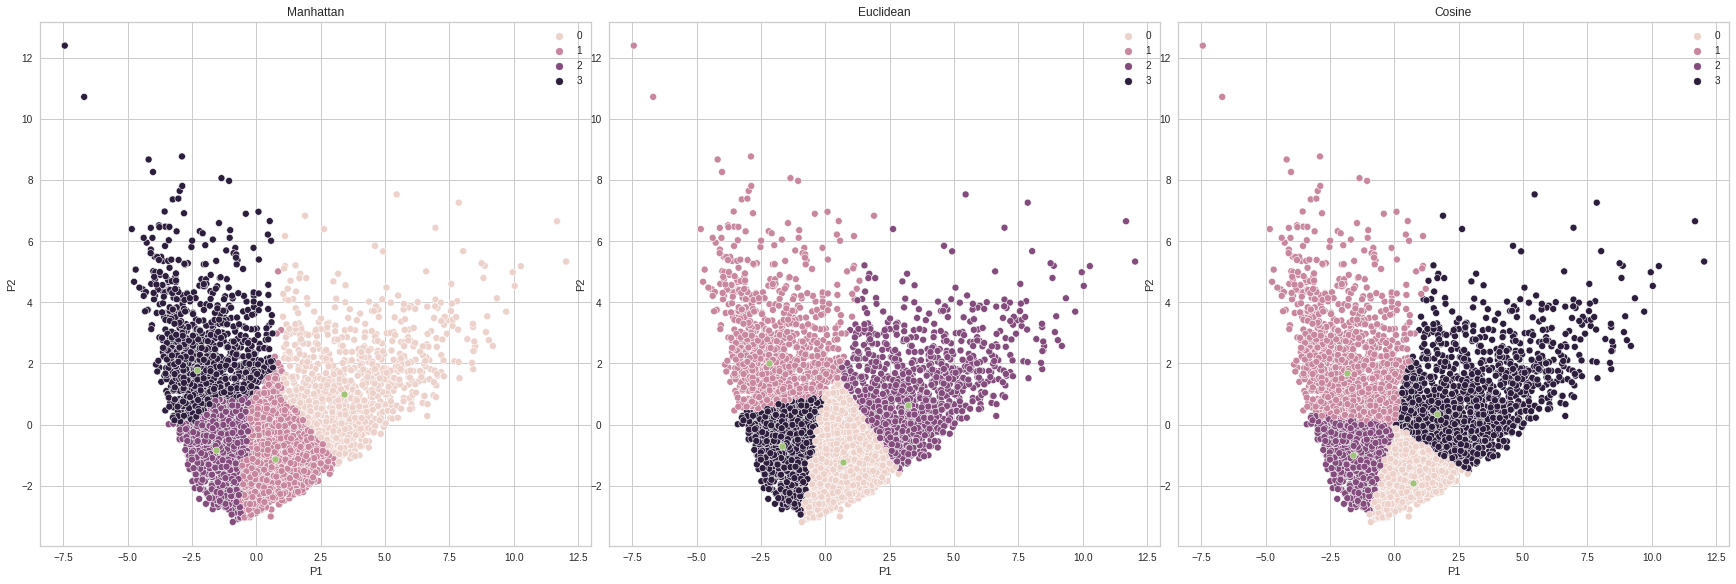

In [ ]:
#creating plot to compare the result by each distance parameter
kmedoids_graph_2 = {'Manhattan': kmedoids_manhattan,
                  'Euclidean': kmedoids_euclidean,
                  'Cosine': kmedoids_cosine}

plt.figure(figsize=(24, 8), constrained_layout=True)
for i, j in zip(kmedoids_graph_2, range(1,4)):
    plt.subplot(1,3,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal_2,
                    hue= kmedoids_graph_2[i].labels_)
    sns.scatterplot(data = None,
                    x = kmedoids_graph_2[i].cluster_centers_[:,0],
                    y = kmedoids_graph_2[i].cluster_centers_[:,1])
    plt.title(i)

###with 3 pca components

In [ ]:
#creating list for metrics
manhattan_avg_withinSS_3 = []
euclidean_avg_withinSS_3 = []
cosine_avg_withinSS_3 = []

#creating list for metrics
kmedoids_avg_withinSS_3 = {'cityblock': manhattan_avg_withinSS_3,
                         'euclidean': euclidean_avg_withinSS_3,
                         'cosine': cosine_avg_withinSS_3}

#looping for running k-medoids
for i, j in product(kmedoids_avg_withinSS_3, number_of_cluster):
    kmedoids = KMedoids(metric=i, n_clusters=j, random_state = 2022)
    kmedoids.fit(X_principal_3)

    D_k = cdist(X_principal_3, kmedoids.cluster_centers_, i)
    cIdx = np.argmin(D_k, axis=1)
    dist = np.min(D_k, axis=1)
    kmedoids_avg_withinSS_3[i].append(sum(dist)/X_principal_3.shape[0])

#creating plot to visualize elbow method scoring
fig = go.Figure()
for i in kmedoids_avg_withinSS_3:
    fig.add_trace(go.Scatter(x=list(number_of_cluster),
                  y=kmedoids_avg_withinSS_3[i],
                  name=i if i != 'cityblock' else 'manhattan'))

fig.update_xaxes(title_text='Number of Clusters')
fig.update_yaxes(title_text='Average Within Sum of Square')
fig.update_layout(width=900, legend_title_text='Metrics')

In [ ]:
# Create Accumulator for matric
manhattan_s_scores_3 = []
manhattan_db_scores_3 = []
manhattan_calinski_scores_3 = []
euclidean_s_scores_3 = []
euclidean_db_scores_3 = []
euclidean_calinski_scores_3 = []
cosine_s_scores_3 = []
cosine_db_scores_3 = []
cosine_calinski_scores_3 = []

kmedoids_metrics_3 = {'manhattan': [manhattan_s_scores_3, manhattan_db_scores_3, manhattan_calinski_scores_3, 'rgb(128,177,211)'],
                    'euclidean': [euclidean_s_scores_3, euclidean_db_scores_3, euclidean_calinski_scores_3, 'rgb(141,211,199)'],
                    'cosine': [cosine_s_scores_3, cosine_db_scores_3, cosine_calinski_scores_3, 'rgb(251,128,114)']}

#looping to run k-medoids by each distance metrics
for i, j in product(kmedoids_metrics_3, number_of_cluster):
    kmedoids = KMedoids(metric=i, n_clusters=j, random_state = 2022)
    kmedoids.fit(X_principal_3)
    kmedoids_metrics_3[i][0].append(silhouette_score(
        X_principal_3, kmedoids.labels_, metric=i))
    kmedoids_metrics_3[i][1].append(davies_bouldin_score(
        X_principal_3, kmedoids.labels_))
    kmedoids_metrics_3[i][2].append(calinski_harabasz_score(
        X_principal_3, kmedoids.labels_))

In [ ]:
#creating plot to compare the result
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in kmedoids_metrics_3:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=kmedoids_metrics_3[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=kmedoids_metrics_3[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Metrics',
                  title_text='Metric Scores',
                  legend_traceorder='reversed')

In [ ]:
#using 4 as number of clusters
kmedoids_manhattan = KMedoids(metric="manhattan", n_clusters=4)
kmedoids_euclidean = KMedoids(metric="euclidean", n_clusters=4)
kmedoids_cosine = KMedoids(metric="cosine", n_clusters=4)

#running the algorithm
kmedoids_manhattan.fit(X_principal_3)
kmedoids_euclidean.fit(X_principal_3)
kmedoids_cosine.fit(X_principal_3)

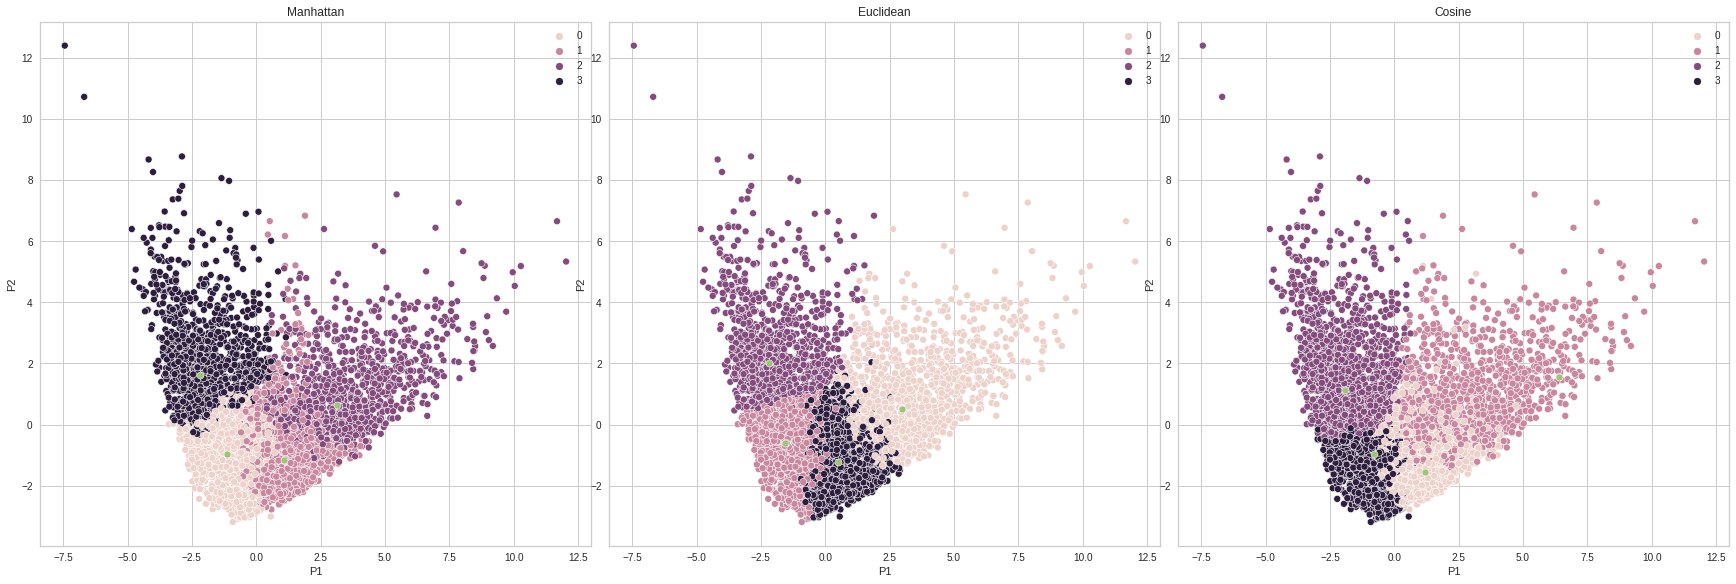

In [ ]:
#creating plot to compare the result by each distance parameter
kmedoids_graph_3 = {'Manhattan': kmedoids_manhattan,
                  'Euclidean': kmedoids_euclidean,
                  'Cosine': kmedoids_cosine}

plt.figure(figsize=(24, 8), constrained_layout=True)
for i, j in zip(kmedoids_graph_3, range(1,4)):
    plt.subplot(1,3,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal_3,
                    hue= kmedoids_graph_3[i].labels_)
    sns.scatterplot(data = None,
                    x = kmedoids_graph_3[i].cluster_centers_[:,0],
                    y = kmedoids_graph_3[i].cluster_centers_[:,1])
    plt.title(i)

##Gaussian Mixture

###With 2 pca components

In [ ]:
# Create Accumulator for matric
full_s_scores_2 = []
full_db_scores_2 = []
full_calinski_scores_2 = []
tied_s_scores_2 = []
tied_db_scores_2 = []
tied_calinski_scores_2 = []
diag_s_scores_2 = []
diag_db_scores_2 = []
diag_calinski_scores_2 = []
spherical_s_scores_2 = []
spherical_db_scores_2 = []
spherical_calinski_scores_2 = []

Gmm_metrics_2 = {'full': [full_s_scores_2, full_db_scores_2, full_calinski_scores_2, 'rgb(128,177,211)'],
                 'tied': [tied_s_scores_2, tied_db_scores_2, tied_calinski_scores_2, 'rgb(141,211,199)'],
                 'diag': [diag_s_scores_2, diag_db_scores_2, diag_calinski_scores_2, 'rgb(251,128,114)'],
                 'spherical':[spherical_s_scores_2, spherical_db_scores_2, spherical_calinski_scores_2, 'rgb(0,0,0)']}

for i, j in product(Gmm_metrics_2, number_of_cluster):
    gmm = GaussianMixture(n_components=j, covariance_type=i)
    y_pred = gmm.fit_predict(X_principal_2)
    Gmm_metrics_2[i][0].append(silhouette_score(
        X_principal_2, y_pred))
    Gmm_metrics_2[i][1].append(davies_bouldin_score(
        X_principal_2, y_pred))
    Gmm_metrics_2[i][2].append(calinski_harabasz_score(
        X_principal_2, y_pred))


In [ ]:
#creating plot to compare the result
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in Gmm_metrics_2:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=Gmm_metrics_2[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=Gmm_metrics_2[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Covariance_type',
                  title_text='Covarince_type Scores',
                  legend_traceorder='reversed')

In [ ]:
#creating new dataframe for agglomerative clustering
df_gmm_2 = X_principal_2.copy()

In [ ]:
#adding new columns for spherical based on sihouette
gmm_spherical = GaussianMixture(n_components=2, covariance_type='spherical')
df_gmm_2['spherical_Sihouette'] = gmm_spherical.fit_predict(X_principal_2)
#adding new columns for spherical based on Davies Bouldin
gmm_spherical = GaussianMixture(n_components=4, covariance_type='spherical')
df_gmm_2['spherical_Davies-Boulin'] = gmm_spherical.fit_predict(X_principal_2)
#adding new columns for spherical based on Calinski-Harabasz
gmm_spherical = GaussianMixture(n_components=4, covariance_type='spherical')
df_gmm_2['spherical_Calinski-Harabasz'] = gmm_spherical.fit_predict(X_principal_2)


#adding new columns for diag based on Sihoutte
gmm_spherical = GaussianMixture(n_components=3, covariance_type='diag')
df_gmm_2['diag_Sihouette'] = gmm_spherical.fit_predict(X_principal_2)
#adding new columns for diag based on Davies Bouldin
gmm_spherical = GaussianMixture(n_components=6, covariance_type='diag')
df_gmm_2['diag_Davies-Boulin'] = gmm_spherical.fit_predict(X_principal_2)
#adding new columns for diag based on Calinksi-Harabasz
gmm_spherical = GaussianMixture(n_components=9, covariance_type='diag')
df_gmm_2['diag_Calinski-Harabasz'] = gmm_spherical.fit_predict(X_principal_2)


#adding new columns for tied based on Sihoutte
gmm_spherical = GaussianMixture(n_components=2, covariance_type='tied')
df_gmm_2['tied_Sihouette'] = gmm_spherical.fit_predict(X_principal_2)
#adding new columns for tied based on Davies Bouldin
gmm_spherical = GaussianMixture(n_components=3, covariance_type='tied')
df_gmm_2['tied_Davies-Boulin'] = gmm_spherical.fit_predict(X_principal_2)
#adding new columns for tied based on Calinksi-Harabasz
gmm_spherical = GaussianMixture(n_components=5, covariance_type='tied')
df_gmm_2['tied_Calinski-Harabasz'] = gmm_spherical.fit_predict(X_principal_2)



#adding new columns for full based on Sihoutte
gmm_spherical = GaussianMixture(n_components=2, covariance_type='full')
df_gmm_2['full_Sihouette'] = gmm_spherical.fit_predict(X_principal_2)
#adding new columns for full based on Davies Bouldin
gmm_spherical = GaussianMixture(n_components=6, covariance_type='full')
df_gmm_2['full_Davies-Boulin'] = gmm_spherical.fit_predict(X_principal_2)
#adding new columns for full based on Calinksi-Harabasz
gmm_spherical = GaussianMixture(n_components=10, covariance_type='full')
df_gmm_2['full_Calinski-Harabasz'] = gmm_spherical.fit_predict(X_principal_2)

#showing dataframe
df_gmm_2

P1        P2  spherical_Sihouette  spherical_Davies-Boulin  \
0    -2.286540  3.004139                    0                        2   
1     1.134736  0.432190                    1                        1   
2    -1.458101 -1.493150                    1                        0   
3     0.740709 -0.539077                    1                        1   
4     0.648372 -1.077172                    1                        1   
...        ...       ...                  ...                      ...   
6461  1.941408 -1.029755                    1                        1   
6462  0.489226 -2.199355                    1                        1   
6463 -0.146912 -2.372580                    1                        1   
6464 -0.677278 -2.305963                    1                        1   
6465 -2.501136 -1.147838                    1                        0   

      spherical_Calinski-Harabasz  diag_Sihouette  diag_Davies-Boulin  \
0                               2               2                   5   
1                               3               0                   1   
2                               1               0                   0   
3                               3               0                   2   
4                               3               0                   2   
...                           ...             ...                 ...   
6461                            3               0                   2   
6462                            3               0                   2   
6463                            3               0                   2   
6464                            3               0                   2   
6465                            1               0                   0   

      diag_Calinski-Harabasz  tied_Sihouette  tied_Davies-Boulin  \
0                          6               0                   1   
1                          3               0                   2   
2                          4               0                   2   
3                          1               0                   2   
4                          1               0                   2   
...                      ...             ...                 ...   
6461                       1               0                   2   
6462                       1               0                   2   
6463                       4               0                   2   
6464                       4               0                   2   
6465                       0               0                   2   

      tied_Calinski-Harabasz  full_Sihouette  full_Davies-Boulin  \
0                          4               0                   5   
1                          3               1                   1   
2                          2               0                   2   
3                          0               1                   0   
4                          0               1                   0   
...                      ...             ...                 ...   
6461                       0               1                   3   
6462                       0               1                   0   
6463                       0               0                   0   
6464                       0               0                   0   
6465                       2               0                   2   

      full_Calinski-Harabasz  
0                          7  
1                          9  
2                          6  
3                          4  
4                          2  
...                      ...  
6461                       9  
6462                       2  
6463                       2  
6464                       6  
6465                       0  

[6466 rows x 14 columns]

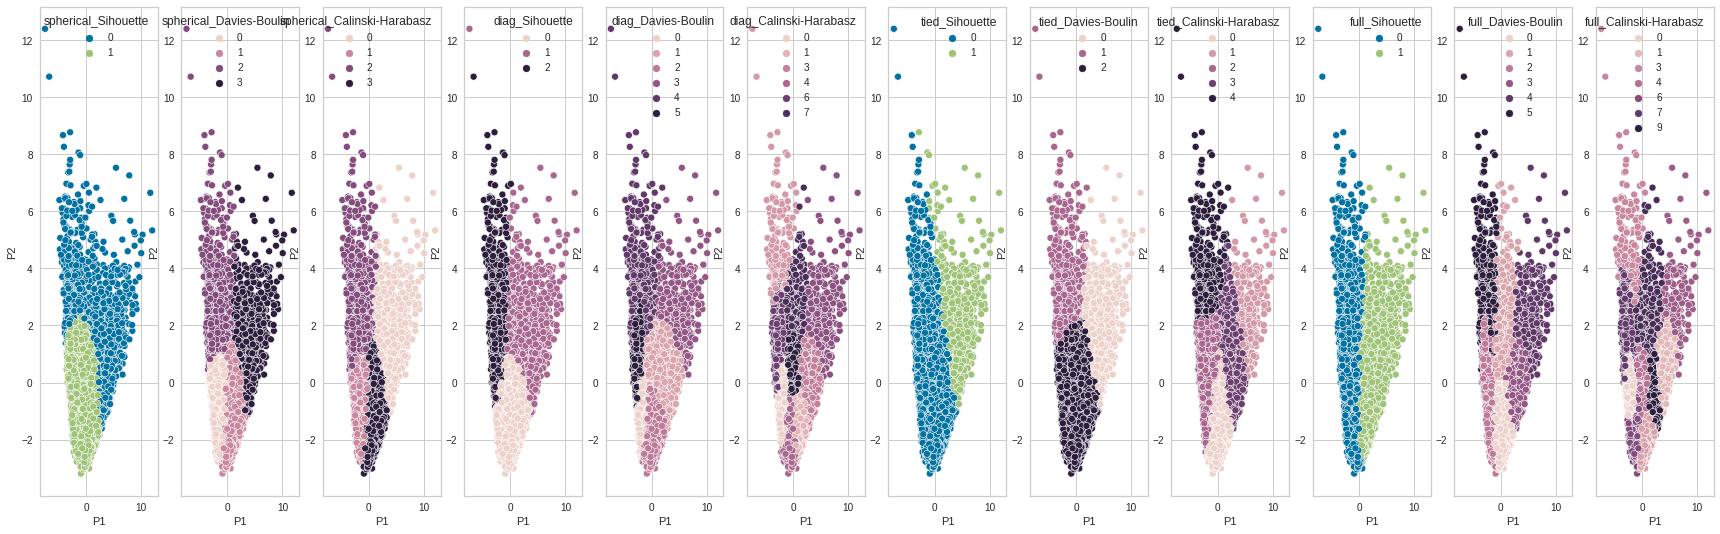

In [ ]:
#creating visualization to compare the result from the best score for each agglomerative clustering method
num, hue = 0, ['spherical_Sihouette','spherical_Davies-Boulin','spherical_Calinski-Harabasz',
               'diag_Sihouette','diag_Davies-Boulin','diag_Calinski-Harabasz',
              'tied_Sihouette','tied_Davies-Boulin','tied_Calinski-Harabasz',
              'full_Sihouette','full_Davies-Boulin','full_Calinski-Harabasz']
plt.figure(figsize=(30, 9))
for i in hue:
    num += 1
    plt.subplot(1, 12, num)
    sns.scatterplot(x='P1', y='P2', hue=i, data=df_gmm_2)

###With 3 pca components

In [ ]:
# Create Accumulator for matric
full_s_scores_3 = []
full_db_scores_3 = []
full_calinski_scores_3 = []
tied_s_scores_3 = []
tied_db_scores_3 = []
tied_calinski_scores_3 = []
diag_s_scores_3 = []
diag_db_scores_3 = []
diag_calinski_scores_3 = []
spherical_s_scores_3 = []
spherical_db_scores_3 = []
spherical_calinski_scores_3 = []

Gmm_metrics_3 = {'full': [full_s_scores_3, full_db_scores_3, full_calinski_scores_3, 'rgb(128,177,211)'],
                 'tied': [tied_s_scores_3, tied_db_scores_3, tied_calinski_scores_3, 'rgb(141,211,199)'],
                 'diag': [diag_s_scores_3, diag_db_scores_3, diag_calinski_scores_3, 'rgb(251,128,114)'],
                 'spherical':[spherical_s_scores_3, spherical_db_scores_3, spherical_calinski_scores_3, 'rgb(0,0,0)']}

for i, j in product(Gmm_metrics_3, number_of_cluster):
    gmm = GaussianMixture(n_components=j, covariance_type=i)
    y_pred = gmm.fit_predict(X_principal_3)
    Gmm_metrics_3[i][0].append(silhouette_score(ُ
        X_principal_3, y_pred))
    Gmm_metrics_3[i][1].append(davies_bouldin_score(
        X_principal_3, y_pred))
    Gmm_metrics_3[i][2].append(calinski_harabasz_score(
        X_principal_3, y_pred))

In [ ]:
#creating plot to compare the result
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for i in Gmm_metrics_3:
    for j, k in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(x=list(number_of_cluster), y=Gmm_metrics_3[i][j-1], name=i.title(),
                                    legendgroup=i, line_color=Gmm_metrics_3[i][-1],
                                    showlegend=False if j != 1 else True), row=j, col=1)
        fig.update_yaxes(title_text=k, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900,
                  legend_title_text='Covariance type',
                  title_text='Covarince_type Scores',
                  legend_traceorder='reversed')

In [ ]:
ُ#creating new dataframe for agglomerative clustering
df_gmm_3 = X_principal_2.copy()

In [ ]:
#adding new columns for spherical based on sihouette
gmm_spherical = GaussianMixture(n_components=2, covariance_type='spherical')
df_gmm_3['spherical_Sihouette'] = gmm_spherical.fit_predict(X_principal_3)
#adding new columns for spherical based on Davies Bouldin
gmm_spherical = GaussianMixture(n_components=3, covariance_type='spherical')
df_gmm_3['spherical_Davies-Boulin'] = gmm_spherical.fit_predict(X_principal_3)
#adding new columns for spherical based on Calinski-Harabasz
gmm_spherical = GaussianMixture(n_components=4, covariance_type='spherical')
df_gmm_3['spherical_Calinski-Harabasz'] = gmm_spherical.fit_predict(X_principal_3)


#adding new columns for diag based on Sihoutte
gmm_spherical = GaussianMixture(n_components=2, covariance_type='diag')
df_gmm_3['diag_Sihouette'] = gmm_spherical.fit_predict(X_principal_3)
#adding new columns for diag based on Davies Bouldin
gmm_spherical = GaussianMixture(n_components=7, covariance_type='diag')
df_gmm_3['diag_Davies-Boulin'] = gmm_spherical.fit_predict(X_principal_3)
#adding new columns for diag based on Calinksi-Harabasz
gmm_spherical = GaussianMixture(n_components=7, covariance_type='diag')
df_gmm_3['diag_Calinski-Harabasz'] = gmm_spherical.fit_predict(X_principal_3)


#adding new columns for tied based on Sihoutte
gmm_spherical = GaussianMixture(n_components=3, covariance_type='tied')
df_gmm_3['tied_Sihouette'] = gmm_spherical.fit_predict(X_principal_3)
#adding new columns for tied based on Davies Bouldin
gmm_spherical = GaussianMixture(n_components=3, covariance_type='tied')
df_gmm_3['tied_Davies-Boulin'] = gmm_spherical.fit_predict(X_principal_3)
#adding new columns for tied based on Calinksi-Harabasz
gmm_spherical = GaussianMixture(n_components=4, covariance_type='tied')
df_gmm_3['tied_Calinski-Harabasz'] = gmm_spherical.fit_predict(X_principal_3)



#adding new columns for full based on Sihoutte
gmm_spherical = GaussianMixture(n_components=2, covariance_type='full')
df_gmm_3['full_Sihouette'] = gmm_spherical.fit_predict(X_principal_3)
#adding new columns for full based on Davies Bouldin
gmm_spherical = GaussianMixture(n_components=7, covariance_type='full')
df_gmm_3['full_Davies-Boulin'] = gmm_spherical.fit_predict(X_principal_3)
#adding new columns for full based on Calinksi-Harabasz
gmm_spherical = GaussianMixture(n_components=2, covariance_type='full')
df_gmm_3['full_Calinski-Harabasz'] = gmm_spherical.fit_predict(X_principal_3)

#showing dataframe
df_gmm_3

P1        P2  spherical_Sihouette  spherical_Davies-Boulin  \
0    -2.286540  3.004139                    1                        2   
1     1.134736  0.432190                    0                        0   
2    -1.458101 -1.493150                    0                        0   
3     0.740709 -0.539077                    0                        0   
4     0.648372 -1.077172                    0                        0   
...        ...       ...                  ...                      ...   
6461  1.941408 -1.029755                    0                        0   
6462  0.489226 -2.199355                    0                        0   
6463 -0.146912 -2.372580                    0                        0   
6464 -0.677278 -2.305963                    0                        0   
6465 -2.501136 -1.147838                    0                        0   

      spherical_Calinski-Harabasz  diag_Sihouette  diag_Davies-Boulin  \
0                               0               0                   0   
1                               3               1                   6   
2                               1               0                   5   
3                               3               1                   1   
4                               3               1                   1   
...                           ...             ...                 ...   
6461                            3               1                   6   
6462                            3               1                   5   
6463                            3               1                   5   
6464                            1               1                   5   
6465                            1               1                   5   

      diag_Calinski-Harabasz  tied_Sihouette  tied_Davies-Boulin  \
0                          3               0                   0   
1                          5               2                   1   
2                          4               2                   1   
3                          6               2                   1   
4                          6               2                   1   
...                      ...             ...                 ...   
6461                       5               2                   1   
6462                       4               2                   1   
6463                       4               2                   1   
6464                       4               2                   1   
6465                       4               2                   1   

      tied_Calinski-Harabasz  full_Sihouette  full_Davies-Boulin  \
0                          3               1                   3   
1                          2               0                   1   
2                          2               1                   6   
3                          1               0                   2   
4                          1               0                   2   
...                      ...             ...                 ...   
6461                       2               0                   1   
6462                       1               0                   0   
6463                       2               1                   0   
6464                       2               1                   0   
6465                       2               1                   0   

      full_Calinski-Harabasz  
0                          0  
1                          1  
2                          0  
3                          1  
4                          1  
...                      ...  
6461                       1  
6462                       1  
6463                       0  
6464                       0  
6465                       0  

[6466 rows x 14 columns]

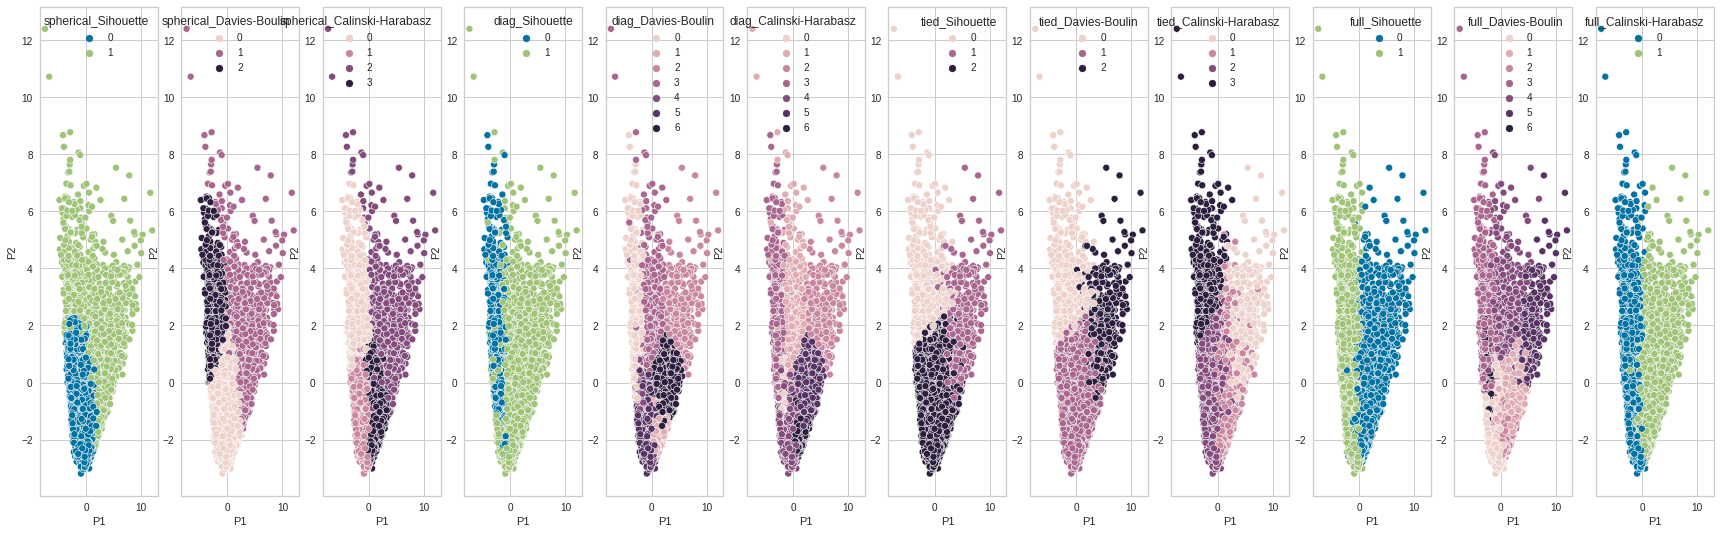

In [ ]:
#creating visualization to compare the result from the best score for each agglomerative clustering method
num, hue = 0, ['spherical_Sihouette','spherical_Davies-Boulin','spherical_Calinski-Harabasz',
               'diag_Sihouette','diag_Davies-Boulin','diag_Calinski-Harabasz',
              'tied_Sihouette','tied_Davies-Boulin','tied_Calinski-Harabasz',
              'full_Sihouette','full_Davies-Boulin','full_Calinski-Harabasz']
plt.figure(figsize=(30, 9))
for i in hue:
    num += 1
    plt.subplot(1, 12, num)
    sns.scatterplot(x='P1', y='P2', hue=i, data=df_gmm_3)

In [ ]:
#using 4 as number of clusters
gmm_spherical = GaussianMixture(n_components=4, covariance_type='spherical')
gmm_diag = GaussianMixture(n_components=4, covariance_type='diag')
gmm_tied = GaussianMixture(n_components=4, covariance_type='tied')
gmm_full = GaussianMixture(n_components=4, covariance_type='full')



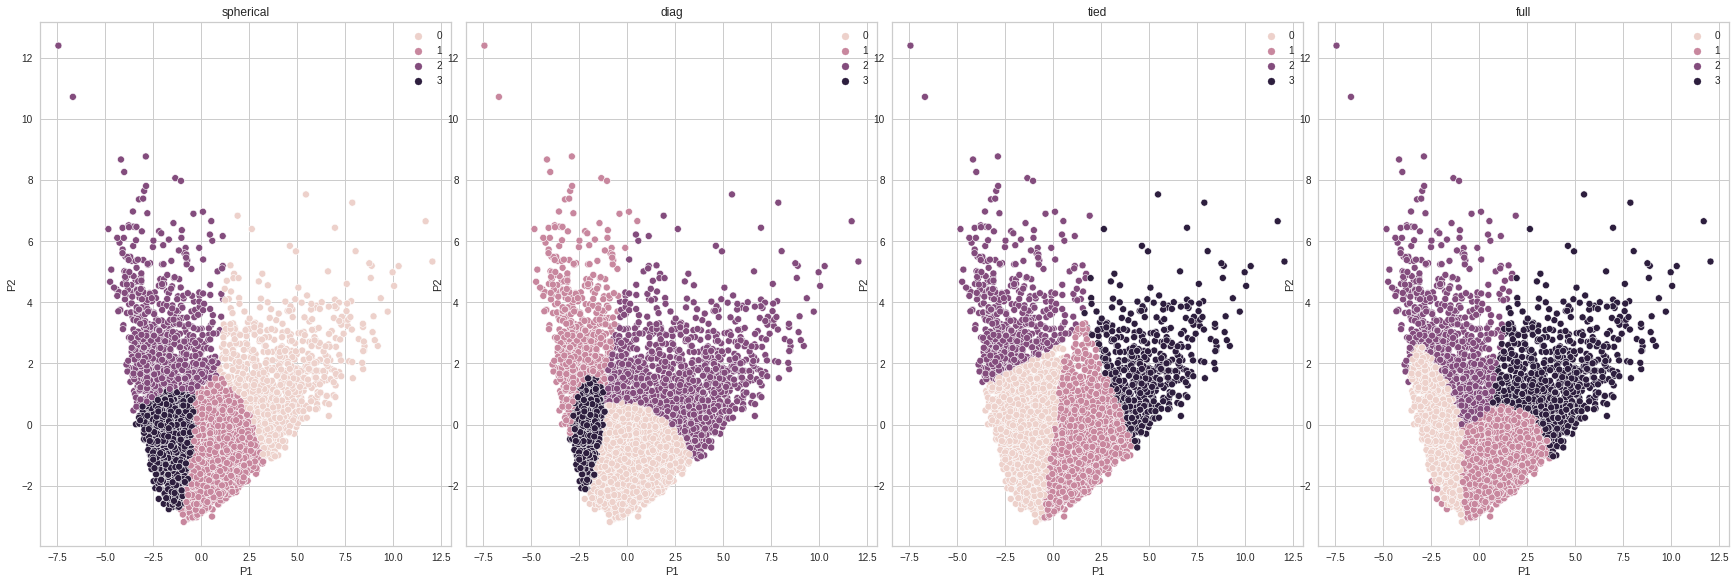

In [ ]:
#creating plot to compare the result by each distance parameter
gmm_graph_2 = {'spherical': gmm_spherical,
                  'diag': gmm_diag,
                  'tied': gmm_tied,
                  'full': gmm_full}

plt.figure(figsize=(24, 8), constrained_layout=True)
for i, j in zip(gmm_graph_2, range(1,5)):
    plt.subplot(1,4,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal_2,
                    hue= gmm_graph_2[i].fit_predict(X_principal_2))

    plt.title(i)

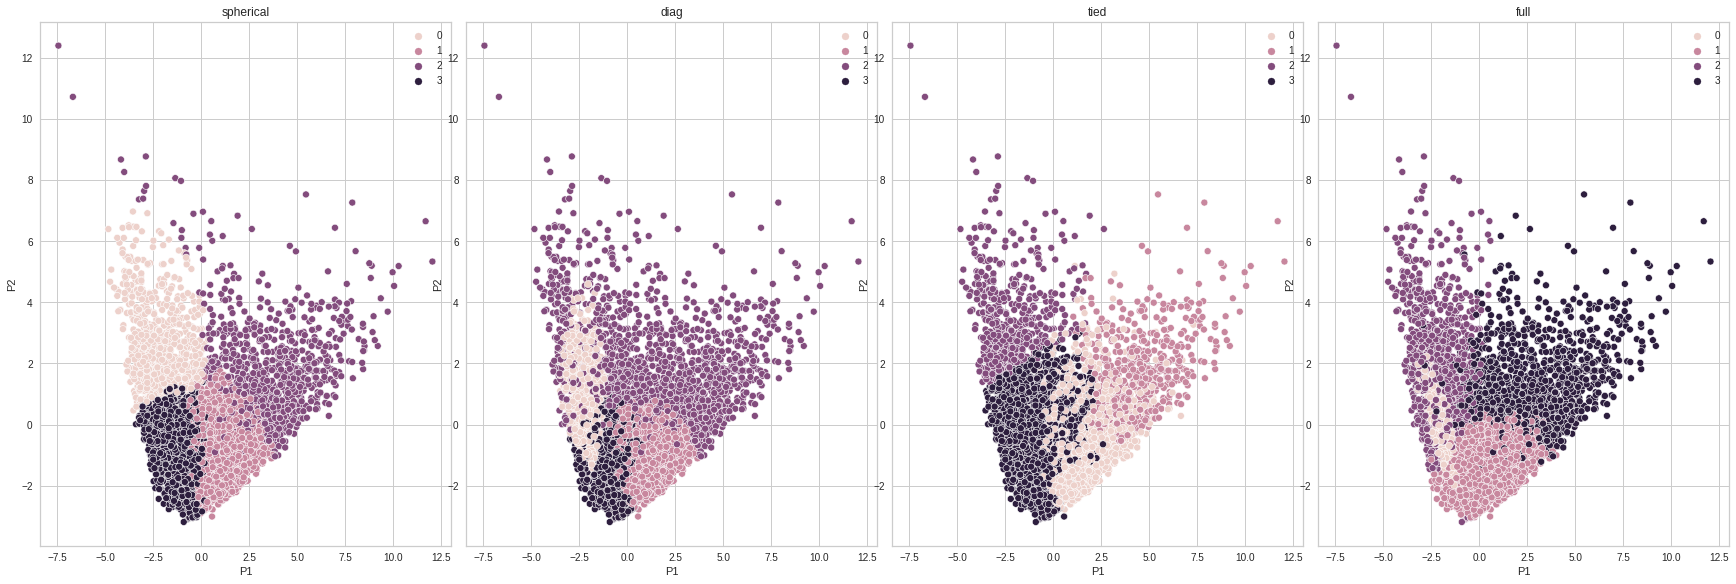

In [ ]:
plt.figure(figsize=(24, 8), constrained_layout=True)
for i, j in zip(gmm_graph_2, range(1,5)):
    plt.subplot(1,4,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal_3,
                    hue= gmm_graph_2[i].fit_predict(X_principal_3))

    plt.title(i)

##KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors
# determine the best value for eps , using the approach in
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
neigh_2 = NearestNeighbors(n_neighbors=2)
nbrs_2 = neigh_2.fit(creditcard_scaled_df)
distances, indices = nbrs_2.kneighbors(creditcard_scaled_df)

# next, we sort and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [ ]:
fig = px.scatter(
    distances,
    title='Distance Curve')
fig.update_xaxes(title_text='Distances')
fig.update_yaxes(title_text='Distance threashold (espsilon)')
fig.show()

In [ ]:
min_sample_values = np.arange(4,22)
# Create Accumulator for matric
dbscan_s_scores_2 = []
dbscan_db_scores_2 = []
dbscan_calinski_scores_2 = []

#looping for modeling
for i in min_sample_values:
    db_scan = DBSCAN(eps=5.22, min_samples = i)
    db_scan.fit(creditcard_scaled_df)
    dbscan_labels_2 = db_scan.fit_predict(creditcard_scaled_df)
    dbscan_s_scores_2.append(silhouette_score(
        creditcard_scaled_df, dbscan_labels_2, metric='euclidean'))
    dbscan_db_scores_2.append(davies_bouldin_score(creditcard_scaled_df, dbscan_labels_2))
    dbscan_calinski_scores_2.append(
        calinski_harabasz_score(creditcard_scaled_df, dbscan_labels_2))

In [ ]:
#creating plot for scoring visualization
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)
dbscan_scores_2 = {'Silhouette': dbscan_s_scores_2,
                'Davies Bouldin': dbscan_db_scores_2,
                'Calinski-Harabasz': dbscan_calinski_scores_2}

for i, score in zip(np.arange(1, 4), dbscan_scores_2):
    fig.append_trace(go.Scatter(
        x=list(min_sample_values), y=dbscan_scores_2[score], name=score), row=i, col=1)
    fig.update_yaxes(title_text=score, row=i, col=1)

fig.update_xaxes(title_text='Min Sample Values', row=3)
fig.update_layout(height=800, width=900,
                  showlegend=False,
                  title_text='Metric Scores')

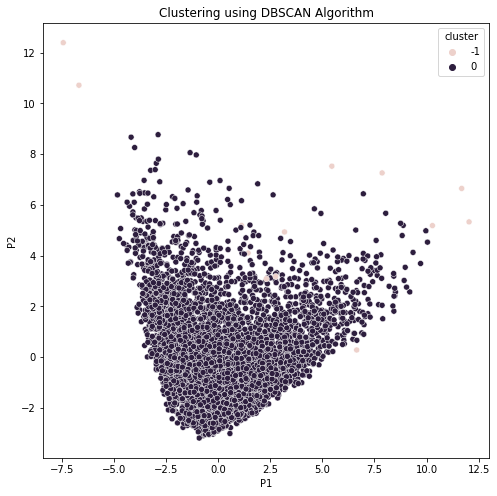

In [ ]:
model_dbscan = DBSCAN(eps=5.22, min_samples=18)
y_pred = model_dbscan.fit_predict(creditcard_scaled_df)
pca2_df_dbscan= pd.concat([X_principal_2,pd.DataFrame({'cluster':model_dbscan.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="P1",y="P2",hue="cluster",data=pca2_df_dbscan)
plt.title("Clustering using DBSCAN Algorithm")
plt.show()

In [ ]:
#best models
gmm_tied = GaussianMixture(n_components=4, covariance_type='tied')
kmedoids_cosine = KMedoids(metric="cosine", n_clusters=4)
kmeans = KMeans(4)
agg_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')


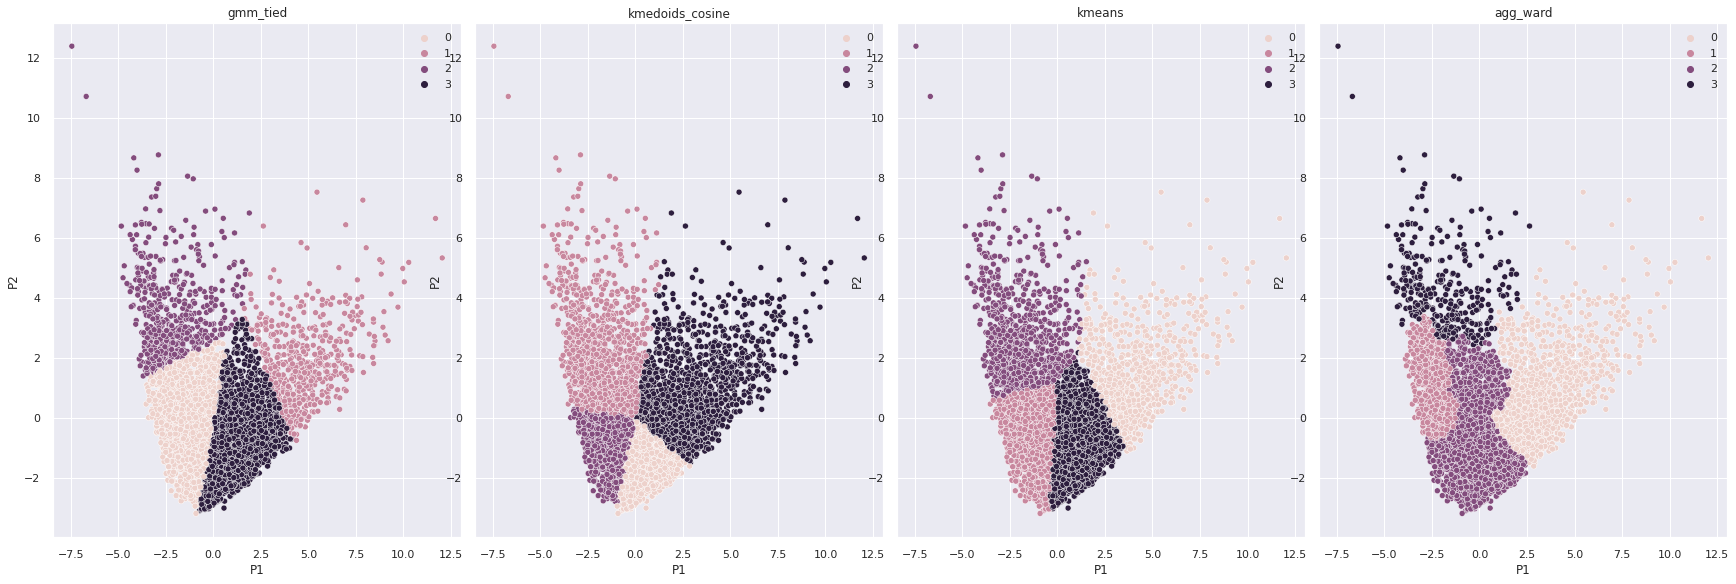

In [ ]:
#creating plot to compare the result by each models
best_models = {'gmm_tied': gmm_tied,
                  'kmedoids_cosine': kmedoids_cosine,
                  'kmeans': kmeans,
                  'agg_ward': agg_ward}
plt.figure(figsize=(24, 8), constrained_layout=True)
for i, j in zip(best_models, range(1,5)):
    plt.subplot(1,4,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal_2,
                    hue= best_models[i].fit_predict(X_principal_2))

    plt.title(i)

##Results from best model

In [ ]:
#choosing best model for clustering
model_fix = KMedoids(metric="cosine", n_clusters=4, random_state = 2022)
model_fix.fit(X_principal_2)
model_fix_centers = model_fix.cluster_centers_
model_fix_labels = model_fix.predict(X_principal_2)
model_fix_centers

array([[ 0.72529833, -1.91184226],
       [-1.84446887,  1.68395215],
       [-1.6103656 , -0.98915854],
       [ 1.67340948,  0.33806214]])

In [ ]:
#add the cluster to dataframe
df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster' :model_fix_labels})], axis = 1)
df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12      1.0  
1  4103.032597       1072.340217          0.222222      12      3.0  
2   622.066742        627.284787          0.000000      12      2.0  
3     0.000000        864.206542          0.000000      12      0.0  
4   678.334763        244.791237          0.000000      12      0.0

In [ ]:
#cluster population
df_cluster['cluster'].value_counts()

2.0    1789
3.0    1631
0.0    1561
1.0    1485
Name: cluster, dtype: int64

In [ ]:
#separating the dataframe by cluster
cluster_0 = df_cluster[df_cluster['cluster'] == 0]
cluster_1 = df_cluster[df_cluster['cluster'] == 1]
cluster_2 = df_cluster[df_cluster['cluster'] == 2]
cluster_3 = df_cluster[df_cluster['cluster'] == 3]

In [ ]:
#summary for each cluster
need_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
d={}
for i in need_columns:
    d[i] = pd.DataFrame(df_cluster.groupby('cluster', axis = 0)[i].describe()[['mean', '50%', 'min', 'max']])

pd.concat(d, axis =1)

BALANCE                                   PURCHASES               \
                mean          50%  min          max         mean     50%  min   
cluster                                                                         
0.0      1786.906592  1074.258487  0.0  19043.13856  1140.813037  405.84  0.0   
1.0      1735.583140  1033.498736  0.0  14224.11541  1076.507960  418.56  0.0   
2.0      1913.231173  1112.070216  0.0  18495.55855  1200.090011  398.64  0.0   
3.0      1860.308710  1076.571029  0.0  16304.88925  1149.762201  420.00  0.0   

                  CASH_ADVANCE                              CREDIT_LIMIT  \
              max         mean        50%  min          max         mean   
cluster                                                                    
0.0      49039.57  1079.360950   0.000000  0.0  27296.48576  5108.367956   
1.0      21802.60  1061.923615  18.149946  0.0  47137.21176  5219.924498   
2.0      40040.71  1059.817917   0.000000  0.0  29282.10915  5250.391280   
3.0      41050.40  1093.187575  38.690552  0.0  22665.77850  5240.767144   

                                    PAYMENTS                                 
            50%    min      max         mean          50%  min          max  
cluster                                                                      
0.0      4000.0  300.0  28000.0  1990.764620   962.359607  0.0  50721.48336  
1.0      4000.0  200.0  30000.0  1933.480730  1060.951647  0.0  40627.59524  
2.0      4000.0  150.0  23000.0  2022.145932  1049.636065  0.0  39461.96580  
3.0      4500.0  150.0  23000.0  1974.903877  1033.581612  0.0  36066.75068

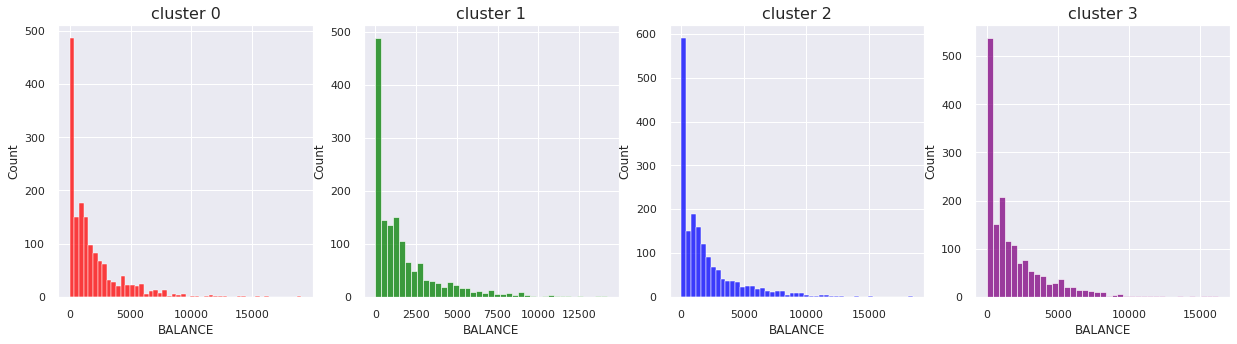

In [ ]:
#plot comparison BALANCE from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['BALANCE'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['BALANCE'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['BALANCE'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['BALANCE'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

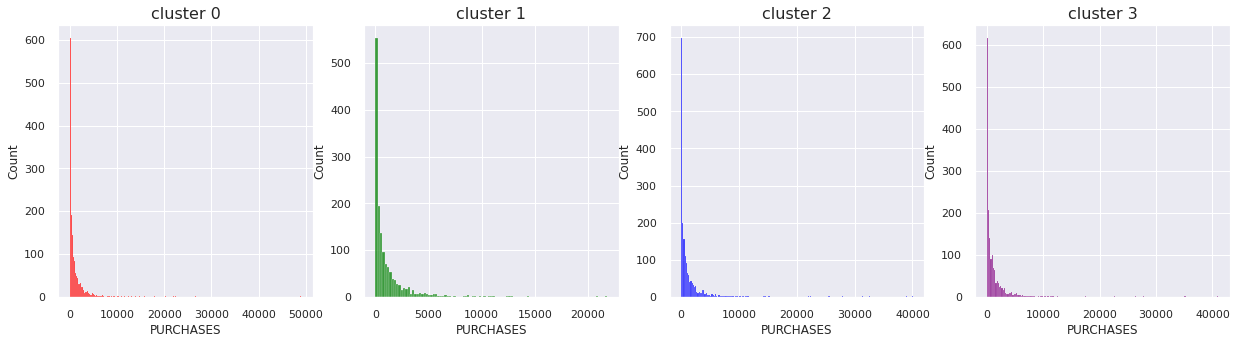

In [ ]:
#plot comparison purchase from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['PURCHASES'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['PURCHASES'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['PURCHASES'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['PURCHASES'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

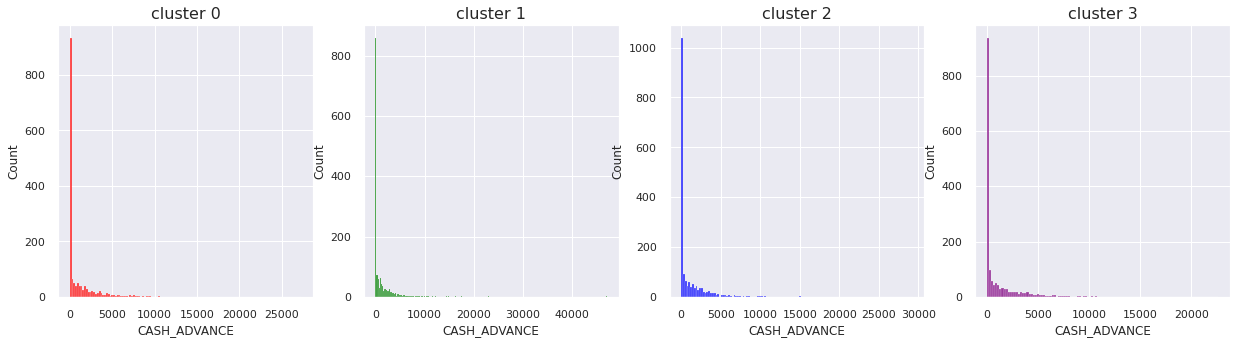

In [ ]:
#plot comparison cash advance from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['CASH_ADVANCE'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['CASH_ADVANCE'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['CASH_ADVANCE'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['CASH_ADVANCE'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

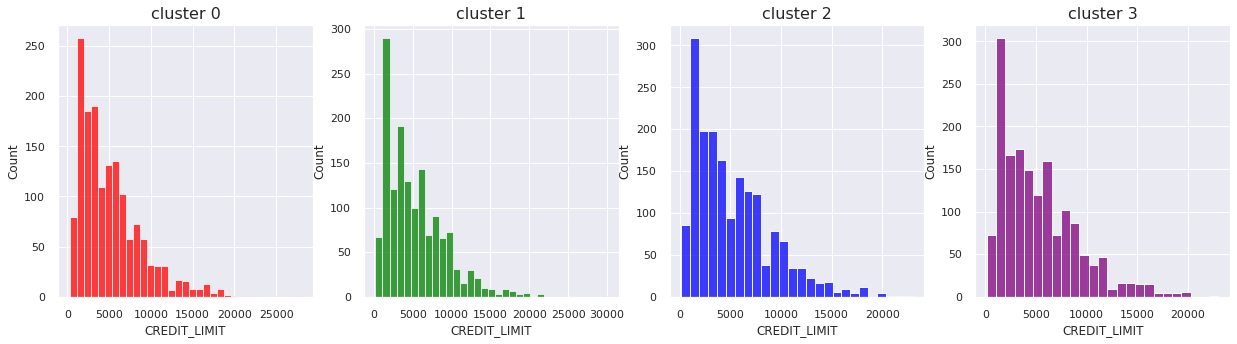

In [ ]:
#plot comparison credit limit from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['CREDIT_LIMIT'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['CREDIT_LIMIT'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['CREDIT_LIMIT'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['CREDIT_LIMIT'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

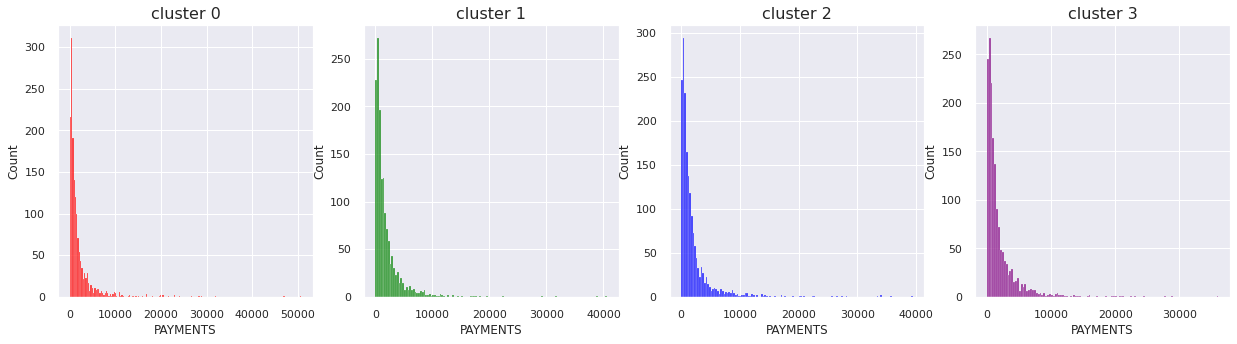

In [ ]:
##plot comparison PAYMENTS from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['PAYMENTS'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['PAYMENTS'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['PAYMENTS'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['PAYMENTS'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

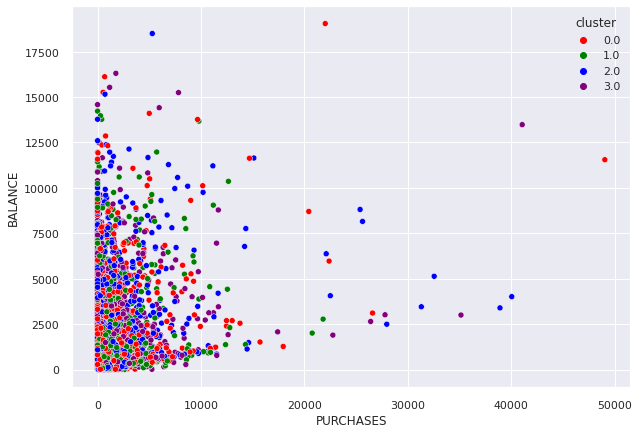

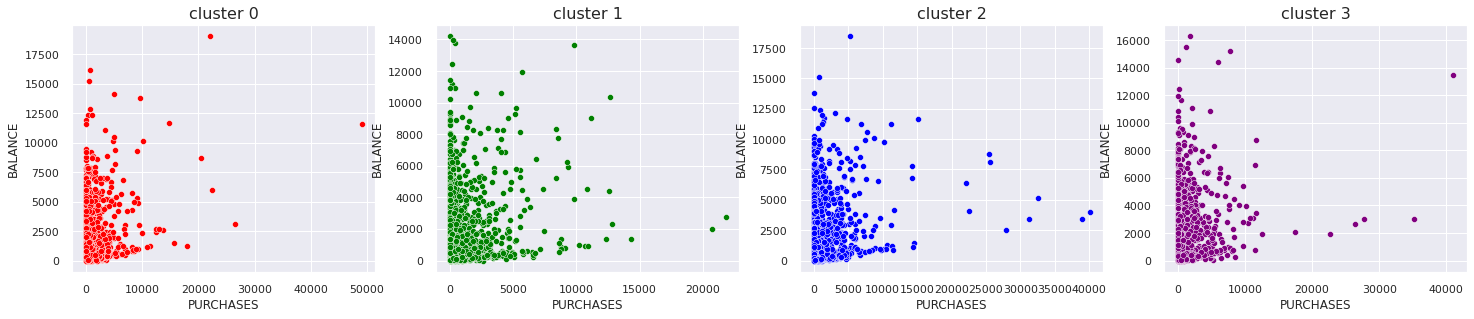

In [ ]:
#plot comparison purchase from each cluster
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_cluster, x = 'PURCHASES', y = 'BALANCE', hue = 'cluster',  palette=['red', 'green', 'blue', 'purple'])
plt.show()
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
sns.scatterplot(cluster_0['PURCHASES'], cluster_0['BALANCE'], color='red')
plt.title('cluster 0', size = 16)
plt.subplot(2,4,2)
sns.scatterplot(cluster_1['PURCHASES'], cluster_1['BALANCE'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(2,4,3)
sns.scatterplot(cluster_2['PURCHASES'], cluster_2['BALANCE'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(2,4,4)
sns.scatterplot(cluster_3['PURCHASES'], cluster_3['BALANCE'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

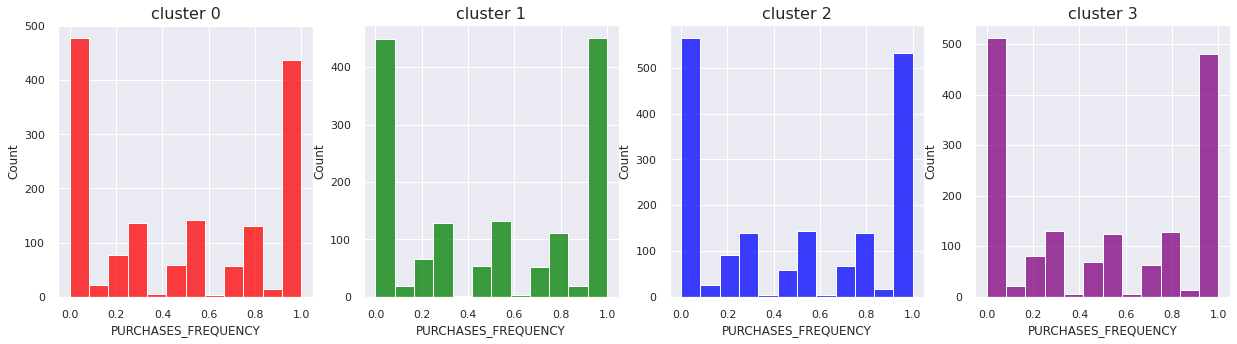

In [ ]:
#plot comparison purchase frequency from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['PURCHASES_FREQUENCY'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['PURCHASES_FREQUENCY'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['PURCHASES_FREQUENCY'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['PURCHASES_FREQUENCY'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

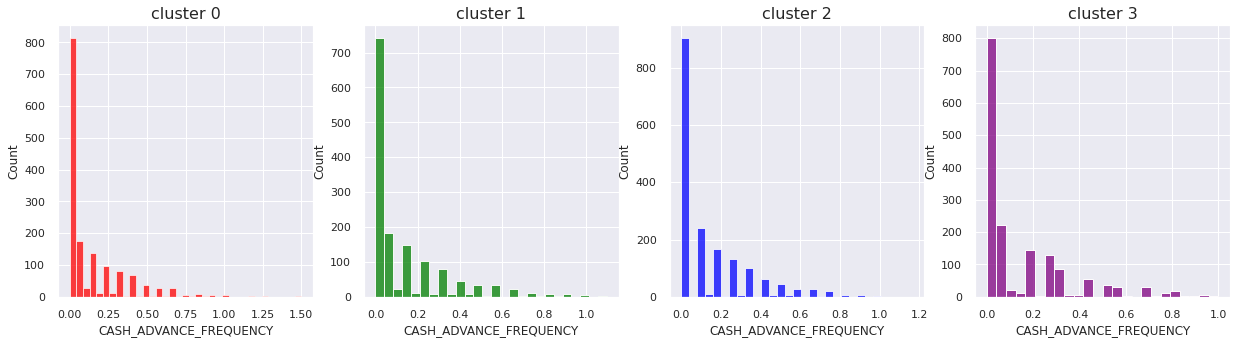

In [ ]:
#plot comparison cash advance frequency from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['CASH_ADVANCE_FREQUENCY'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['CASH_ADVANCE_FREQUENCY'], color='green')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['CASH_ADVANCE_FREQUENCY'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['CASH_ADVANCE_FREQUENCY'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()